In [123]:
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import matplotlib.cm as cm
from matplotlib.ticker import AutoMinorLocator
from sklearn.linear_model import LinearRegression
from matplotlib.legend_handler import HandlerTuple
import matplotlib.ticker as ticker
import IPython
import imgkit

# Data on MCR 

# CTAB (C16) + NaSal -> WLMs

# First data set

In [2]:
# WLM = 25mM CTAB and 12.5mM NaSal (r=2)
cnf0WLM_r2 = pd.read_csv('/Users/ningravi/Desktop/Python/Raw Data WLM and CNF/6_30_23 Correct one/20230630_WLMs_0_025MCTAB0_0125MNaSal(made20230629) amplitude sweep.csv', header=None, skiprows=range(0, 9), encoding='utf-16', delimiter='\t')
cnf001WLM_r2 = pd.read_csv('/Users/ningravi/Desktop/Python/Raw Data WLM and CNF/7_06_23/20230706_WLMs_0_01CNF0_025MCTAB0_0125MNaSal(made20230629) Amplitude Sweep.csv', header=None, skiprows=range(0, 9), encoding='utf-16', delimiter='\t')
cnf005WLM_r2 = pd.read_csv('/Users/ningravi/Desktop/Python/Raw Data WLM and CNF/7_07_23/20230706_0_05CNF_0_025MCTAB0_0125MNaSal(made20230629) Amplitude Sweep .csv', header=None, skiprows=range(0, 9), encoding='utf-16', delimiter='\t')
cnf01WLM_r2 = pd.read_csv('/Users/ningravi/Desktop/Python/Raw Data WLM and CNF/7_10_23/20230710_0_1CNF_0_025MCTAB0_0125MNaSal(made20230629) Amplitude Sweep.csv', header=None, skiprows=range(0, 9), encoding='utf-16', delimiter='\t')

In [3]:
cnf0WLM_r2_strain = cnf0WLM_r2.iloc[1:42, 6].astype(float)
cnf0WLM_r2_g1 = cnf0WLM_r2.iloc[1:42, 3].astype(float)
cnf0WLM_r2_g2 = cnf0WLM_r2.iloc[1:42, 4].astype(float)

cnf001WLM_r2_strain = cnf001WLM_r2.iloc[1:42, 6].astype(float)
cnf001WLM_r2_g1 = cnf001WLM_r2.iloc[1:42, 3].astype(float)
cnf001WLM_r2_g2 = cnf001WLM_r2.iloc[1:42, 4].astype(float)

cnf005WLM_r2_strain = cnf005WLM_r2.iloc[1:42, 6].astype(float)
cnf005WLM_r2_g1 = cnf005WLM_r2.iloc[1:42, 3].astype(float)
cnf005WLM_r2_g2 = cnf005WLM_r2.iloc[1:42, 4].astype(float)

cnf01WLM_r2_strain = cnf01WLM_r2.iloc[1:42, 6].astype(float)
cnf01WLM_r2_g1 = cnf01WLM_r2.iloc[1:42, 3].astype(float)
cnf01WLM_r2_g2 = cnf01WLM_r2.iloc[1:42, 4].astype(float)

In [4]:
cnf0WLM_f_r2 = pd.read_csv('/Users/ningravi/Desktop/Python/Raw Data WLM and CNF/6_30_23 Correct one/20230630_WLMs_0_025MCTAB0_0125MNaSal(made20230629) frequency sweep.csv', header=None, skiprows=range(0, 9), encoding='utf-16', delimiter='\t')
cnf001WLM_f_r2 = pd.read_csv('/Users/ningravi/Desktop/Python/Raw Data WLM and CNF/7_06_23/20230706_WLMs_0_01CNF0_025MCTAB0_0125MNaSal(made20230629) Frequency Sweep.csv', header=None, skiprows=range(0, 9), encoding='utf-16', delimiter='\t')
cnf005WLM_f_r2 = pd.read_csv('/Users/ningravi/Desktop/Python/Raw Data WLM and CNF/7_07_23/20230706_0_05CNF_0_025MCTAB0_0125MNaSal(made20230629) Frequency Sweep.csv', header=None, skiprows=range(0, 9), encoding='utf-16', delimiter='\t')
cnf01WLM_f_r2 = pd.read_csv('/Users/ningravi/Desktop/Python/Raw Data WLM and CNF/7_10_23/20230710_0_1CNF_0_025MCTAB0_0125MNaSal(made20230629) frequency sweep.csv', header=None, skiprows=range(0, 9), encoding='utf-16', delimiter='\t')

In [5]:
cnf0WLM_f_r2_fre = cnf0WLM_f_r2.iloc[1:42, 2].astype(float)
cnf0WLM_f_r2_g1 = cnf0WLM_f_r2.iloc[1:42, 3].astype(float)
cnf0WLM_f_r2_g2 = cnf0WLM_f_r2.iloc[1:42, 4].astype(float)

cnf001WLM_f_r2_fre= cnf001WLM_f_r2.iloc[1:42, 2].astype(float)
cnf001WLM_f_r2_g1 = cnf001WLM_f_r2.iloc[1:42, 3].astype(float)
cnf001WLM_f_r2_g2 = cnf001WLM_f_r2.iloc[1:42, 4].astype(float)

cnf005WLM_f_r2_fre = cnf005WLM_f_r2.iloc[1:42, 2].astype(float)
cnf005WLM_f_r2_g1 = cnf005WLM_f_r2.iloc[1:42, 3].astype(float)
cnf005WLM_f_r2_g2 = cnf005WLM_f_r2.iloc[1:42, 4].astype(float)

cnf01WLM_f_r2_fre = cnf01WLM_f_r2.iloc[1:42, 2].astype(float)
cnf01WLM_f_r2_g1 = cnf01WLM_f_r2.iloc[1:42, 3].astype(float)
cnf01WLM_f_r2_g2 = cnf01WLM_f_r2.iloc[1:42, 4].astype(float)

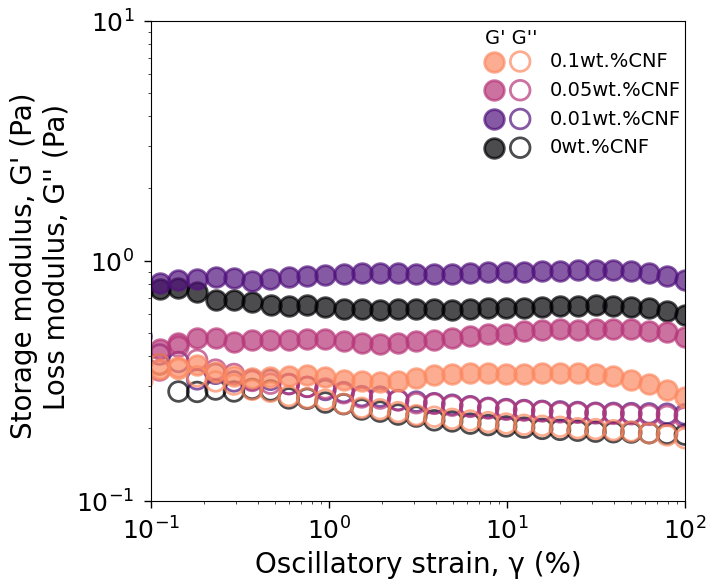

In [28]:
os_strain_WLM_r2 = [cnf0WLM_r2_strain, cnf001WLM_r2_strain, cnf005WLM_r2_strain, cnf01WLM_r2_strain]
WLM_r2_g1 = [cnf0WLM_r2_g1, cnf001WLM_r2_g1, cnf005WLM_r2_g1, cnf01WLM_r2_g1]
WLM_r2_g2 = [cnf0WLM_r2_g2, cnf001WLM_r2_g2, cnf005WLM_r2_g2, cnf01WLM_r2_g2]
WLM_r2_label_g1 = ['.', '.', '.','.']
WLM_r2_label_g2 = ['0wt.%CNF', '0.01wt.%CNF', '0.05wt.%CNF', '0.1wt.%CNF']

cmap = plt.get_cmap('magma')

# Plot the data
fig, ax = plt.subplots(figsize=(6, 6))

for idx, (x, y1, y2, label1, label2) in enumerate(zip(os_strain_WLM_r2, WLM_r2_g1, WLM_r2_g2, WLM_r2_label_g1, WLM_r2_label_g2)):
    c = cmap(float(idx) / len(os_strain_WLM_r2))
    scatter1 = plt.scatter(x, y1, c=np.atleast_2d(c), s =200, alpha = 0.7,
                marker='o', facecolors=c, edgecolors=c, linewidths=2, label=label1)
    scatter2 = plt.scatter(x, y2, c=np.atleast_2d(c), s =200, alpha = 0.7,
                marker='o', edgecolors=c, linewidths=2, label=label2)
    scatter2.set_facecolor('none') 
  

plt.style.use('seaborn-notebook')
#plt.rcParams['font.family'] = 'Arial'
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Oscillatory strain, γ (%)', fontsize=20)
plt.ylabel("Storage modulus, G' (Pa) \n Loss modulus, G'' (Pa)", fontsize=20)

legend_handles = [(scatter1, scatter2) for scatter1, scatter2 in zip(scatter1.get_paths(), scatter2.get_paths())]
legend_labels = WLM_r2_label_g2 

handler_map = {}
for handle, label in zip(legend_handles, legend_labels):
    handler_map[handle] = HandlerTuple(ndivide=None, pad=0.3)

handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[1::2] + handles[::2]  # Combine G1 and G2 handles
labels =  labels[1::2] + labels[::2]   # Combine G1 and G2 labels

label_colors = ['white' if i < 4 else 'black' for i in range(len(labels))]
legend = plt.legend(handles[::-1], labels[::-1], frameon=False, fontsize=14, 
           handler_map=handler_map, labelcolor=label_colors, ncol =2,
          handlelength=-5, handletextpad=4, loc = (0.72, 0.7))

plt.subplots_adjust(left=0.01, right=0.9, top=0.9, bottom=0.1)  # Adjust the values as needed
 
plt.text(7.5, 8, "G' G''", fontsize=14, color='black')

plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(0.1, 100)
plt.ylim(0.1, 10)
#plt.savefig("Amplitude Sweeps of WLM(CTAB&NaSal) with Effect of Adding CNF at 25C.png", dpi=1500, bbox_inches='tight')
plt.show()

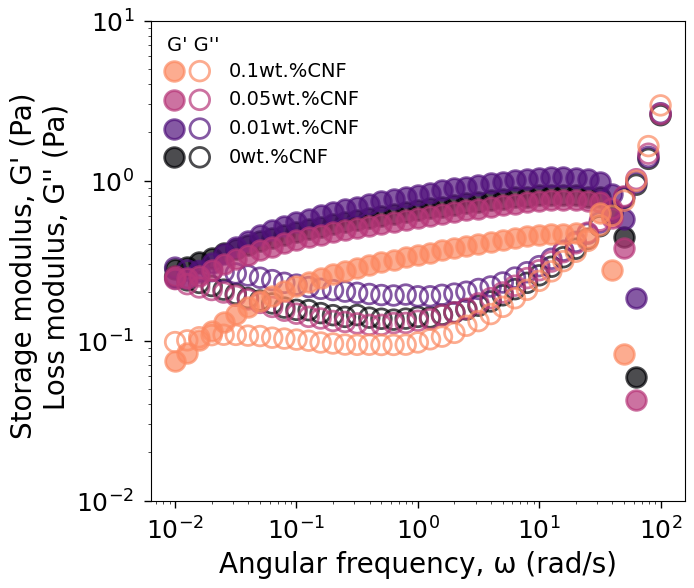

In [40]:
ang_fre_WLM_r2 = [cnf0WLM_f_r2_fre, cnf001WLM_f_r2_fre, cnf005WLM_f_r2_fre, cnf01WLM_f_r2_fre]
WLM_f_r2_g1 = [cnf0WLM_f_r2_g1, cnf001WLM_f_r2_g1, cnf005WLM_f_r2_g1, cnf01WLM_f_r2_g1]
WLM_f_r2_g2 = [cnf0WLM_f_r2_g2, cnf001WLM_f_r2_g2, cnf005WLM_f_r2_g2, cnf01WLM_f_r2_g2]
WLM_f_r2_label_g1 = ['.', '.', '.','.']
WLM_f_r2_label_g2 = ['0wt.%CNF', '0.01wt.%CNF', '0.05wt.%CNF', '0.1wt.%CNF']

cmap = plt.get_cmap('magma')

# Plot the data
fig, ax = plt.subplots(figsize=(6, 6))

for idx, (x, y1, y2, label1, label2) in enumerate(zip(ang_fre_WLM_r2, WLM_f_r2_g1, WLM_f_r2_g2, WLM_f_r2_label_g1, WLM_f_r2_label_g2)):
    c = cmap(float(idx) / len(ang_fre_WLM_r2))
    scatter1 = plt.scatter(x, y1, c=np.atleast_2d(c), s =200, alpha = 0.7,
                marker='o', facecolors=c, edgecolors=c, linewidths=2, label=label1)
    scatter2 = plt.scatter(x, y2, c=np.atleast_2d(c), s =200, alpha = 0.7,
                marker='o', edgecolors=c, linewidths=2, label=label2)
    scatter2.set_facecolor('none') 
  

plt.style.use('seaborn-notebook')
#plt.rcParams['font.family'] = 'Arial'
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Angular frequency, \u03C9 (rad/s)', fontsize=20)
plt.ylabel("Storage modulus, G' (Pa) \n Loss modulus, G'' (Pa)", fontsize=20)

legend_handles = [(scatter1, scatter2) for scatter1, scatter2 in zip(scatter1.get_paths(), scatter2.get_paths())]
legend_labels = WLM_r2_label_g2 

handler_map = {}
for handle, label in zip(legend_handles, legend_labels):
    handler_map[handle] = HandlerTuple(ndivide=None, pad=0.3)

handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[1::2] + handles[::2]  # Combine G1 and G2 handles
labels =  labels[1::2] + labels[::2]   # Combine G1 and G2 labels

label_colors = ['white' if i < 4 else 'black' for i in range(len(labels))]
legend = plt.legend(handles[::-1], labels[::-1], frameon=False, fontsize=14, 
           handler_map=handler_map, labelcolor=label_colors, ncol =2,
          handlelength=-5, handletextpad=4, loc = (0.12, 0.68))

plt.subplots_adjust(left=0.01, right=0.9, top=0.9, bottom=0.1)  # Adjust the values as needed
 
plt.text(0.0085, 6.5, "G' G''", fontsize=14, color='black')

plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.xlim(0.01, 10)
plt.ylim(0.01, 10)
#plt.savefig("Frequency Sweeps WLM(CTAB&NaSal) Varying CNF Concentrations at 25C.png", dpi=1500, bbox_inches='tight')
plt.show()

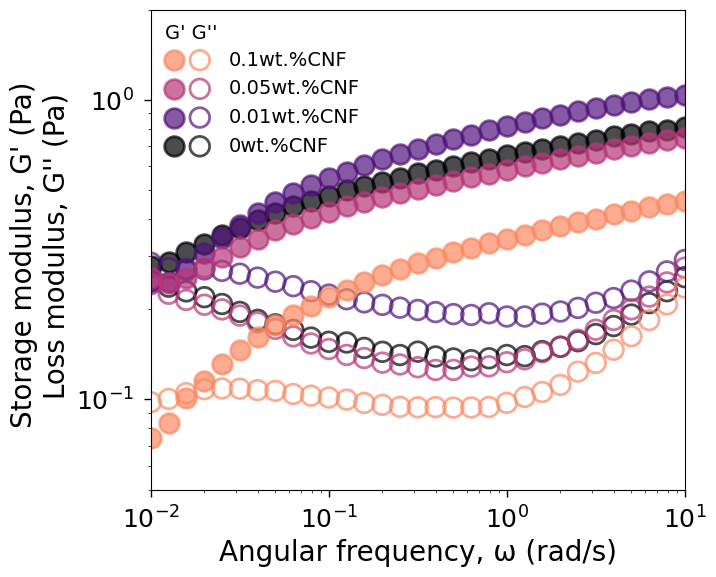

In [41]:
ang_fre_WLM_r2 = [cnf0WLM_f_r2_fre, cnf001WLM_f_r2_fre, cnf005WLM_f_r2_fre, cnf01WLM_f_r2_fre]
WLM_f_r2_g1 = [cnf0WLM_f_r2_g1, cnf001WLM_f_r2_g1, cnf005WLM_f_r2_g1, cnf01WLM_f_r2_g1]
WLM_f_r2_g2 = [cnf0WLM_f_r2_g2, cnf001WLM_f_r2_g2, cnf005WLM_f_r2_g2, cnf01WLM_f_r2_g2]
WLM_f_r2_label_g1 = ['.', '.', '.','.']
WLM_f_r2_label_g2 = ['0wt.%CNF', '0.01wt.%CNF', '0.05wt.%CNF', '0.1wt.%CNF']

cmap = plt.get_cmap('magma')

# Plot the data
fig, ax = plt.subplots(figsize=(6, 6))

for idx, (x, y1, y2, label1, label2) in enumerate(zip(ang_fre_WLM_r2, WLM_f_r2_g1, WLM_f_r2_g2, WLM_f_r2_label_g1, WLM_f_r2_label_g2)):
    c = cmap(float(idx) / len(ang_fre_WLM_r2))
    scatter1 = plt.scatter(x, y1, c=np.atleast_2d(c), s =200, alpha = 0.7,
                marker='o', facecolors=c, edgecolors=c, linewidths=2, label=label1)
    scatter2 = plt.scatter(x, y2, c=np.atleast_2d(c), s =200, alpha = 0.7,
                marker='o', edgecolors=c, linewidths=2, label=label2)
    scatter2.set_facecolor('none') 
  

plt.style.use('seaborn-notebook')
#plt.rcParams['font.family'] = 'Arial'
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Angular frequency, \u03C9 (rad/s)', fontsize=20)
plt.ylabel("Storage modulus, G' (Pa) \n Loss modulus, G'' (Pa)", fontsize=20)

legend_handles = [(scatter1, scatter2) for scatter1, scatter2 in zip(scatter1.get_paths(), scatter2.get_paths())]
legend_labels = WLM_r2_label_g2 

handler_map = {}
for handle, label in zip(legend_handles, legend_labels):
    handler_map[handle] = HandlerTuple(ndivide=None, pad=0.3)

handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[1::2] + handles[::2]  # Combine G1 and G2 handles
labels =  labels[1::2] + labels[::2]   # Combine G1 and G2 labels

label_colors = ['white' if i < 4 else 'black' for i in range(len(labels))]
legend = plt.legend(handles[::-1], labels[::-1], frameon=False, fontsize=14, 
           handler_map=handler_map, labelcolor=label_colors, ncol =2,
          handlelength=-5, handletextpad=4, loc = (0.12, 0.68))

plt.subplots_adjust(left=0.01, right=0.9, top=0.9, bottom=0.1)  # Adjust the values as needed
 
plt.text(0.012, 1.6, "G' G''", fontsize=14, color='black')

plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(0.01, 10)
plt.ylim(0.05, 2)
#plt.savefig("Frequency Sweeps WLM(CTAB&NaSal) Varying CNF Concentrations at 25C cropped full.png", dpi=1500, bbox_inches='tight')
plt.show()

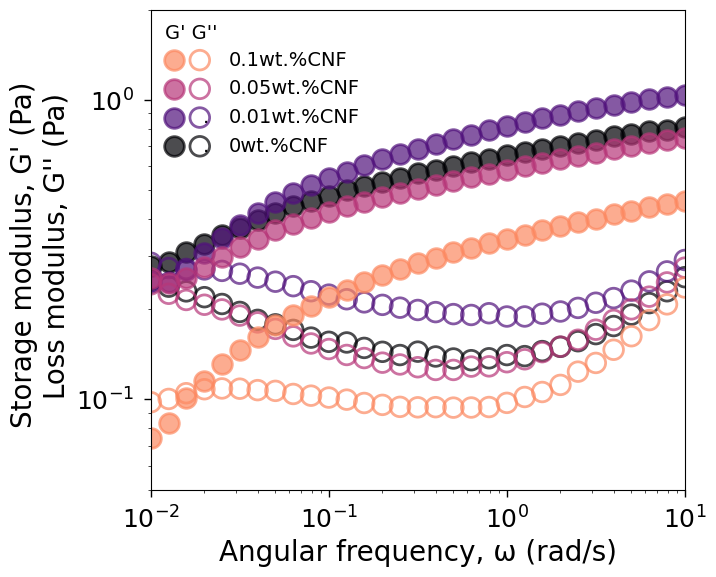

In [49]:
ang_fre_WLM_r2 = [cnf0WLM_f_r2_fre, cnf001WLM_f_r2_fre, cnf005WLM_f_r2_fre, cnf01WLM_f_r2_fre]
WLM_f_r2_g1 = [cnf0WLM_f_r2_g1, cnf001WLM_f_r2_g1, cnf005WLM_f_r2_g1, cnf01WLM_f_r2_g1]
WLM_f_r2_g2 = [cnf0WLM_f_r2_g2, cnf001WLM_f_r2_g2, cnf005WLM_f_r2_g2, cnf01WLM_f_r2_g2]
WLM_f_r2_label_g1 = ['.', '.', '.','.']
WLM_f_r2_label_g2 = ['0wt.%CNF', '0.01wt.%CNF', '0.05wt.%CNF', '0.1wt.%CNF']

cmap = plt.get_cmap('magma')

# Plot the data
fig, ax = plt.subplots(figsize=(6, 6))

for idx, (x, y1, y2, label1, label2) in enumerate(zip(ang_fre_WLM_r2, WLM_f_r2_g1, WLM_f_r2_g2, WLM_f_r2_label_g1, WLM_f_r2_label_g2)):
    if idx < 4:
        c = cmap(float(idx) / len(ang_fre_WLM_r2))
        scatter1 = plt.scatter(x, y1, c=np.atleast_2d(c), s =200, alpha = 0.7,
                    marker='o', facecolors=c, edgecolors=c, linewidths=2, label=label1)
        scatter2 = plt.scatter(x, y2, c=np.atleast_2d(c), s =200, alpha = 0.7,
                    marker='o', edgecolors=c, linewidths=2, label=label2)
        scatter2.set_facecolor('none') 
  

plt.style.use('seaborn-notebook')
#plt.rcParams['font.family'] = 'Arial'
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Angular frequency, \u03C9 (rad/s)', fontsize=20)
plt.ylabel("Storage modulus, G' (Pa) \n Loss modulus, G'' (Pa)", fontsize=20)

legend_handles = [(scatter1, scatter2) for scatter1, scatter2 in zip(scatter1.get_paths(), scatter2.get_paths())]
legend_labels = WLM_r2_label_g2 

handler_map = {}
for handle, label in zip(legend_handles, legend_labels):
    handler_map[handle] = HandlerTuple(ndivide=None, pad=0.3)

handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[1::2] + handles[::2]  # Combine G1 and G2 handles
labels =  labels[1::2] + labels[::2]   # Combine G1 and G2 labels

label_colors = ['white' if i < 2 else 'black' for i in range(len(labels))]
legend = plt.legend(handles[::-1], labels[::-1], frameon=False, fontsize=14, 
           handler_map=handler_map, labelcolor=label_colors, ncol =2,
          handlelength=-5, handletextpad=4, loc = (0.12, 0.68))

plt.subplots_adjust(left=0.01, right=0.9, top=0.9, bottom=0.1)  # Adjust the values as needed
 
plt.text(0.012, 1.6, "G' G''", fontsize=14, color='black')

plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(0.01, 10)
plt.ylim(0.05, 2)
#plt.savefig("Frequency Sweeps WLM(CTAB&NaSal) Varying CNF Concentrations at 25C cropped 0 to 0.1.png", dpi=1500, bbox_inches='tight')
plt.show()

In [8]:
cnf0WLM_f_r2_fre_2 = cnf0WLM_f_r2.iloc[1:22, 2].astype(float)
cnf0WLM_f_r2_g1_2 = cnf0WLM_f_r2.iloc[1:22, 3].astype(float)
cnf0WLM_f_r2_g2_2 = cnf0WLM_f_r2.iloc[1:22, 4].astype(float)

cnf001WLM_f_r2_fre_2= cnf001WLM_f_r2.iloc[1:22, 2].astype(float)
cnf001WLM_f_r2_g1_2 = cnf001WLM_f_r2.iloc[1:22, 3].astype(float)
cnf001WLM_f_r2_g2_2 = cnf001WLM_f_r2.iloc[1:22, 4].astype(float)

cnf005WLM_f_r2_fre_2 = cnf005WLM_f_r2.iloc[1:22, 2].astype(float)
cnf005WLM_f_r2_g1_2 = cnf005WLM_f_r2.iloc[1:22, 3].astype(float)
cnf005WLM_f_r2_g2_2 = cnf005WLM_f_r2.iloc[1:22, 4].astype(float)

cnf01WLM_f_r2_fre_2 = cnf01WLM_f_r2.iloc[1:22, 2].astype(float)
cnf01WLM_f_r2_g1_2 = cnf01WLM_f_r2.iloc[1:22, 3].astype(float)
cnf01WLM_f_r2_g2_2 = cnf01WLM_f_r2.iloc[1:22, 4].astype(float)

   Data Set          CNF    G'      λ_1   G''     λ_2
0         1     0wt.%CNF  0.54  10.6234  0.51  4.8220
1         2  0.01wt.%CNF  0.68   6.3808  0.67  3.3443
2         3  0.05wt.%CNF  0.48   9.7797  0.49  4.9721
3         4   0.1wt.%CNF  0.28   5.1836  0.29  2.1528


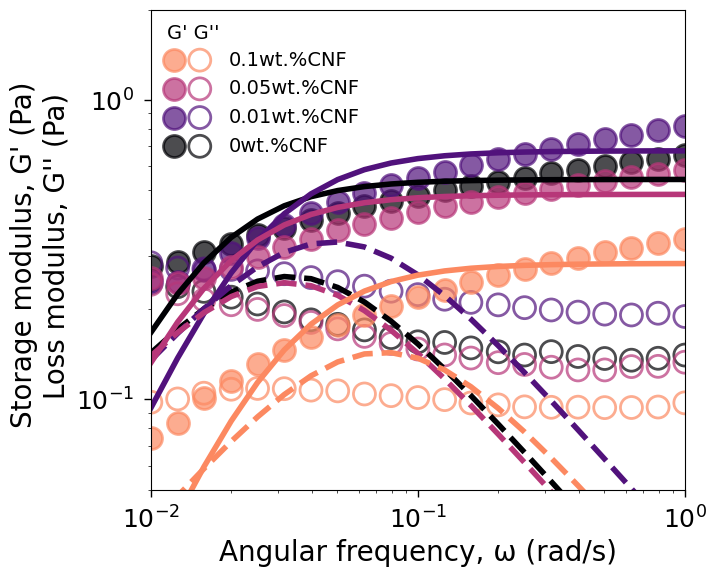

In [9]:
ang_fre_WLM_r2_2 = [cnf0WLM_f_r2_fre_2, cnf001WLM_f_r2_fre_2, cnf005WLM_f_r2_fre_2, cnf01WLM_f_r2_fre_2]
WLM_f_r2_g1_2 = [cnf0WLM_f_r2_g1_2, cnf001WLM_f_r2_g1_2, cnf005WLM_f_r2_g1_2, cnf01WLM_f_r2_g1_2]
WLM_f_r2_g2_2 = [cnf0WLM_f_r2_g2_2, cnf001WLM_f_r2_g2_2, cnf005WLM_f_r2_g2_2, cnf01WLM_f_r2_g2_2]
WLM_f_r2_label_g1_2 = ['.', '.', '.','.']
WLM_f_r2_label_g2_2 = ['0wt.%CNF', '0.01wt.%CNF', '0.05wt.%CNF', '0.1wt.%CNF']

def model1(ω, G0, λ_i):
    return G0 * (ω**2 * λ_i**2) / (1 + ω**2 * λ_i**2)

def model2(ω, G0, λ_i):
    return G0 * (ω * λ_i) / (1 + ω**2 * λ_i**2)

fitting_results_CNFWLM = []

cmap = plt.get_cmap('magma')

# Plot the data
fig, ax = plt.subplots(figsize=(6, 6))

for idx, (x, y1, y2, label1, label2) in enumerate(zip(ang_fre_WLM_r2_2, WLM_f_r2_g1_2, WLM_f_r2_g2_2, WLM_f_r2_label_g1, WLM_f_r2_label_g2)):
    c = cmap(float(idx) / len(ang_fre_WLM_r2_2))
    scatter1 = plt.scatter(x, y1, c=np.atleast_2d(c), s =250, alpha = 0.7,
                marker='o', facecolors=c, edgecolors=c, linewidths=2, label=label1)
    scatter2 = plt.scatter(x, y2, c=np.atleast_2d(c), s =250, alpha = 0.7,
                marker='o', edgecolors=c, linewidths=2, label=label2)
    scatter2.set_facecolor('none') 
    
    x_flat_CNFWLM = np.ravel(x)
    y1_flat_CNFWLM = np.ravel(y1)
    y2_flat_CNFWLM = np.ravel(y2)
    
    G0_guess_1 = np.max(y1_flat_CNFWLM)
    lambda_guess_1 = 0.01
    G0_guess_2 = np.max(y2_flat_CNFWLM)
    lambda_guess_2 = 0.01
        
    popt1_CNFWLM, _ = curve_fit(model1, x_flat_CNFWLM, y1_flat_CNFWLM, p0=[G0_guess_1, lambda_guess_1])
    popt2_CNFWLM, _ = curve_fit(model2, x_flat_CNFWLM, y2_flat_CNFWLM, p0=[G0_guess_2, lambda_guess_2])
        
    G0_1_CNFWLM, lambda_1_CNFWLM = popt1_CNFWLM[0], popt1_CNFWLM[1]
    G0_2_CNFWLM, lambda_2_CNFWLM = popt2_CNFWLM[0], popt2_CNFWLM[1]

    #print(f"Fitting results for Data Set {idx+1}:")
    #print("Fitting results for G':")
        #print(f"G0_1: {G0_1:.2f}")
        #print(f"λ_1: {lambda_1:.4f}")
        
        #print("Fitting results for G'':")
        #print(f"G0_2: {G0_2:.2f}")
        #print(f"λ_2: {lambda_2:.4f}")
        #print("-------------------------------")
        
    plt.plot(x, model1(x, *popt1_CNFWLM), '-', c=c, linewidth=4)
    plt.plot(x, model2(x, *popt2_CNFWLM), '--', c=c, linewidth=4)
    fitting_results_CNFWLM.append({
        'Data Set': idx+1,
        'CNF': label2,
        "G'": f"{G0_1_CNFWLM:.2f}",
        "λ_1": f"{lambda_1_CNFWLM*0.159154943 :.4f}",
        "G''": f"{G0_2_CNFWLM:.2f}",
        "λ_2": f"{lambda_2_CNFWLM*0.159154943 :.4f}"
        })
fitting_df_CNFWLM = pd.DataFrame(fitting_results_CNFWLM)
print(fitting_df_CNFWLM)

plt.style.use('seaborn-notebook')
#plt.rcParams['font.family'] = 'Arial'
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Angular frequency, \u03C9 (rad/s)', fontsize=20)
plt.ylabel("Storage modulus, G' (Pa) \n Loss modulus, G'' (Pa)", fontsize=20)

legend_handles = [(scatter1, scatter2) for scatter1, scatter2 in zip(scatter1.get_paths(), scatter2.get_paths())]
legend_labels = WLM_r2_label_g2 

handler_map = {}
for handle, label in zip(legend_handles, legend_labels):
    handler_map[handle] = HandlerTuple(ndivide=None, pad=0.3)

handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[1::2] + handles[::2]  # Combine G1 and G2 handles
labels =  labels[1::2] + labels[::2]   # Combine G1 and G2 labels

label_colors = ['white' if i < 4 else 'black' for i in range(len(labels))]
legend = plt.legend(handles[::-1], labels[::-1], frameon=False, fontsize=14, 
           handler_map=handler_map, labelcolor=label_colors, ncol =2,
          handlelength=-5, handletextpad=4, loc = (0.12, 0.68))

plt.subplots_adjust(left=0.01, right=0.9, top=0.9, bottom=0.1)  # Adjust the values as needed
 
plt.text(0.0115, 1.6, "G' G''", fontsize=14, color='black')

plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(0.01, 1)
plt.ylim(0.05, 2)
#plt.savefig("Amplitude Sweeps of WLM(CTAB&NaSal) with Effect of Adding CNF fitted.png", dpi=1500, bbox_inches='tight')
plt.show()

   Data Set          CNF    G'      λ_1   G''      λ_2
0         1     0wt.%CNF  0.54  66.7487  0.51  30.2978
1         2  0.01wt.%CNF  0.68  40.0919  0.67  21.0131
2         3  0.05wt.%CNF  0.48  61.4477  0.49  31.2408
3         4   0.1wt.%CNF  0.28  32.5697  0.29  13.5263


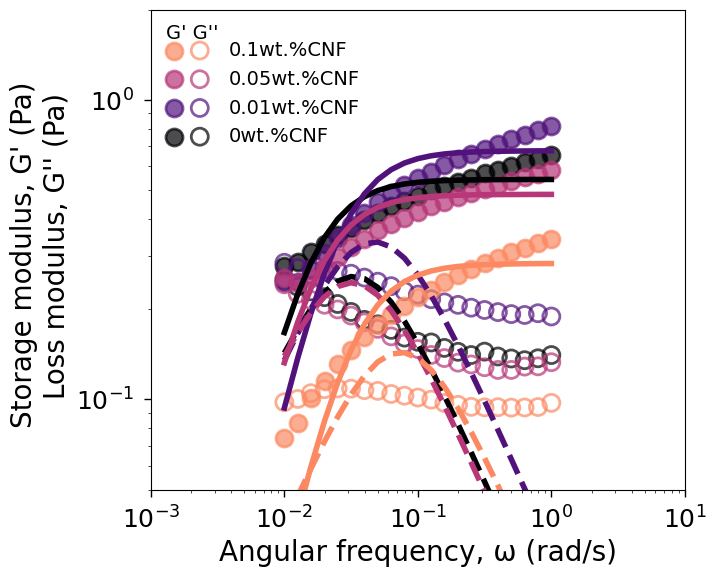

In [10]:
# try fitting the Maxwell model at lower anf frequency
ang_fre_WLM_r2_2 = [cnf0WLM_f_r2_fre_2, cnf001WLM_f_r2_fre_2, cnf005WLM_f_r2_fre_2, cnf01WLM_f_r2_fre_2]
WLM_f_r2_g1_2 = [cnf0WLM_f_r2_g1_2, cnf001WLM_f_r2_g1_2, cnf005WLM_f_r2_g1_2, cnf01WLM_f_r2_g1_2]
WLM_f_r2_g2_2 = [cnf0WLM_f_r2_g2_2, cnf001WLM_f_r2_g2_2, cnf005WLM_f_r2_g2_2, cnf01WLM_f_r2_g2_2]
WLM_f_r2_label_g1_2 = ['.', '.', '.','.']
WLM_f_r2_label_g2_2 = ['0wt.%CNF', '0.01wt.%CNF', '0.05wt.%CNF', '0.1wt.%CNF']

def model1(ω, G0, λ_i):
    return G0 * (ω**2 * λ_i**2) / (1 + ω**2 * λ_i**2)

def model2(ω, G0, λ_i):
    return G0 * (ω * λ_i) / (1 + ω**2 * λ_i**2)

fitting_results_CNFWLM = []

cmap = plt.get_cmap('magma')

# Plot the data
fig, ax = plt.subplots(figsize=(6, 6))

for idx, (x, y1, y2, label1, label2) in enumerate(zip(ang_fre_WLM_r2_2, WLM_f_r2_g1_2, WLM_f_r2_g2_2, WLM_f_r2_label_g1, WLM_f_r2_label_g2)):
    c = cmap(float(idx) / len(ang_fre_WLM_r2_2))
    scatter1 = plt.scatter(x, y1, c=np.atleast_2d(c), s =150, alpha = 0.7,
                marker='o', facecolors=c, edgecolors=c, linewidths=2, label=label1)
    scatter2 = plt.scatter(x, y2, c=np.atleast_2d(c), s =150, alpha = 0.7,
                marker='o', edgecolors=c, linewidths=2, label=label2)
    scatter2.set_facecolor('none') 
    
    x_flat_CNFWLM = np.ravel(x)
    y1_flat_CNFWLM = np.ravel(y1)
    y2_flat_CNFWLM = np.ravel(y2)
    
    G0_guess_1 = np.max(y1_flat_CNFWLM)
    lambda_guess_1 = 0.01
    G0_guess_2 = np.max(y2_flat_CNFWLM)
    lambda_guess_2 = 0.01
        
    popt1_CNFWLM, _ = curve_fit(model1, x_flat_CNFWLM, y1_flat_CNFWLM, p0=[G0_guess_1, lambda_guess_1])
    popt2_CNFWLM, _ = curve_fit(model2, x_flat_CNFWLM, y2_flat_CNFWLM, p0=[G0_guess_2, lambda_guess_2])
        
    G0_1_CNFWLM, lambda_1_CNFWLM = popt1_CNFWLM[0], popt1_CNFWLM[1]
    G0_2_CNFWLM, lambda_2_CNFWLM = popt2_CNFWLM[0], popt2_CNFWLM[1]

    #print(f"Fitting results for Data Set {idx+1}:")
    #print("Fitting results for G':")
        #print(f"G0_1: {G0_1:.2f}")
        #print(f"λ_1: {lambda_1:.4f}")
        
        #print("Fitting results for G'':")
        #print(f"G0_2: {G0_2:.2f}")
        #print(f"λ_2: {lambda_2:.4f}")
        #print("-------------------------------")
        
    plt.plot(x, model1(x, *popt1_CNFWLM), '-', c=c, linewidth=4)
    plt.plot(x, model2(x, *popt2_CNFWLM), '--', c=c, linewidth=4)
    fitting_results_CNFWLM.append({
        'Data Set': idx+1,
        'CNF': label2,
        "G'": f"{G0_1_CNFWLM:.2f}",
        "λ_1": f"{lambda_1_CNFWLM:.4f}",
        "G''": f"{G0_2_CNFWLM:.2f}",
        "λ_2": f"{lambda_2_CNFWLM:.4f}"
        })
fitting_df_CNFWLM = pd.DataFrame(fitting_results_CNFWLM)
print(fitting_df_CNFWLM)

plt.style.use('seaborn-notebook')
#plt.rcParams['font.family'] = 'Arial'
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Angular frequency, \u03C9 (rad/s)', fontsize=20)
plt.ylabel("Storage modulus, G' (Pa) \n Loss modulus, G'' (Pa)", fontsize=20)

legend_handles = [(scatter1, scatter2) for scatter1, scatter2 in zip(scatter1.get_paths(), scatter2.get_paths())]
legend_labels = WLM_r2_label_g2 

handler_map = {}
for handle, label in zip(legend_handles, legend_labels):
    handler_map[handle] = HandlerTuple(ndivide=None, pad=0.3)

handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[1::2] + handles[::2]  # Combine G1 and G2 handles
labels =  labels[1::2] + labels[::2]   # Combine G1 and G2 labels

label_colors = ['white' if i < 4 else 'black' for i in range(len(labels))]
legend = plt.legend(handles[::-1], labels[::-1], frameon=False, fontsize=14, 
           handler_map=handler_map, labelcolor=label_colors, ncol =2,
          handlelength=-5, handletextpad=4, loc = (0.12, 0.7))

plt.subplots_adjust(left=0.01, right=0.9, top=0.9, bottom=0.1)  # Adjust the values as needed
 
plt.text(0.0013, 1.6, "G' G''", fontsize=14, color='black')

plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(0.001, 10)
plt.ylim(0.05, 2)
#plt.savefig("Amplitude Sweeps of WLM(CTAB&NaSal) with Effect of Adding CNF fitted.png", dpi=1500, bbox_inches='tight')
plt.show()

# Second data set

In [11]:
# WLM = 25mM CTAB and 12.5mM NaSal (r=2)
cnf0WLM_r2_25 = pd.read_csv('/Users/ningravi/Desktop/Python/Raw Data WLM and CNF/7_17_23/20230717_WLMs_0_025MCTAB0_0125MNaSal(made20230714) amplitude sweep.csv', header=None, skiprows=range(0, 9), encoding='utf-16', delimiter='\t')
cnf0WLM_r2_50 = pd.read_csv('/Users/ningravi/Desktop/Python/Raw Data WLM and CNF/7_17_23/20230717_50C_WLMs_0_025MCTAB0_0125MNaSal(made2023071423) amplitude sweep.csv', header=None, skiprows=range(0, 9), encoding='utf-16', delimiter='\t')

cnf001WLM_r2_25 = pd.read_csv('/Users/ningravi/Desktop/Python/Raw Data WLM and CNF/7_18_23/20230718_0_01CNF_0_025MCTAB0_0125MNaSal(made20230718) Amplitude sweep.csv', header=None, skiprows=range(0, 9), encoding='utf-16', delimiter='\t')
cnf001WLM_r2_50 = pd.read_csv('/Users/ningravi/Desktop/Python/Raw Data WLM and CNF/7_18_23/20230718_50C_0_01CNF_0_025MCTAB0_0125MNaSal(made20230717) amplitude sweep.csv', header=None, skiprows=range(0, 9), encoding='utf-16', delimiter='\t')

cnf005WLM_r2_25 = pd.read_csv('/Users/ningravi/Desktop/Python/Raw Data WLM and CNF/7_31_23/20230731_0_05CNF_0_025MCTAB0_0125MNaSal(made20230718) AMPLITUDE SWEEP.csv', header=None, skiprows=range(0, 9), encoding='utf-16', delimiter='\t')
#1 dec
cnf005WLM_r2_50 = pd.read_csv('/Users/ningravi/Desktop/Python/Raw Data WLM and CNF/7_20_23/20230720_50C_0_05CNF_0_025MCTAB0_0125MNaSal(made20230629) Amplitude sweep.csv', header=None, skiprows=range(0, 9), encoding='utf-16', delimiter='\t')

cnf01WLM_r2_25 = pd.read_csv('/Users/ningravi/Desktop/Python/Raw Data WLM and CNF/7_31_23/20230731_0_1CNF_0_025MCTAB0_0125MNaSal(made20230719) AMPLITUDE SWEEP.csv', header=None, skiprows=range(0, 9), encoding='utf-16', delimiter='\t')
#1 dec
cnf01WLM_r2_50 = pd.read_csv('/Users/ningravi/Desktop/Python/Raw Data WLM and CNF/7_24_23/20230724_50C_0_1CNF_0_025MCTAB0_0125MNaSal(made20230719) Amplitude sweep.csv', header=None, skiprows=range(0, 9), encoding='utf-16', delimiter='\t')

In [12]:
cnf0WLM_f_r2_25 = pd.read_csv('/Users/ningravi/Desktop/Python/Raw Data WLM and CNF/7_17_23/20230717_WLMs_0_025MCTAB0_0125MNaSal(made20230714) frequency sweep.csv', header=None, skiprows=range(0, 9), encoding='utf-16', delimiter='\t')
cnf0WLM_f_r2_50 = pd.read_csv('/Users/ningravi/Desktop/Python/Raw Data WLM and CNF/7_17_23/20230717_50C_WLMs_0_025MCTAB0_0125MNaSal(made2023071423) frequency sweep.csv', header=None, skiprows=range(0, 9), encoding='utf-16', delimiter='\t')

cnf001WLM_f_r2_25 = pd.read_csv('/Users/ningravi/Desktop/Python/Raw Data WLM and CNF/7_18_23/20230718_0_01CNF_0_025MCTAB0_0125MNaSal(made20230718) freqency sweep.csv', header=None, skiprows=range(0, 9), encoding='utf-16', delimiter='\t')
cnf001WLM_f_r2_50 = pd.read_csv('/Users/ningravi/Desktop/Python/Raw Data WLM and CNF/7_18_23/20230718_50C_0_01CNF_0_025MCTAB0_0125MNaSal(made20230717) frequency sweep.csv', header=None, skiprows=range(0, 9), encoding='utf-16', delimiter='\t')

cnf005WLM_f_r2_25 = pd.read_csv('/Users/ningravi/Desktop/Python/Raw Data WLM and CNF/7_31_23/20230731_0_05CNF_0_025MCTAB0_0125MNaSal(made20230718) FREQUENCY SWEEP.csv', header=None, skiprows=range(0, 9), encoding='utf-16', delimiter='\t')
#1 dec
cnf005WLM_f_r2_50 = pd.read_csv('/Users/ningravi/Desktop/Python/Raw Data WLM and CNF/7_20_23/20230720_50C_0_05CNF_0_025MCTAB0_0125MNaSal(made20230629)frequency sweep.csv', header=None, skiprows=range(0, 9), encoding='utf-16', delimiter='\t')

cnf01WLM_f_r2_25 = pd.read_csv('/Users/ningravi/Desktop/Python/Raw Data WLM and CNF/7_31_23/20230731_0_1CNF_0_025MCTAB0_0125MNaSal(made20230719) FREQUENCY SWEEP.csv', header=None, skiprows=range(0, 9), encoding='utf-16', delimiter='\t')
#1 dec
cnf01WLM_f_r2_50 = pd.read_csv('//Users/ningravi/Desktop/Python/Raw Data WLM and CNF/7_24_23/20230724_50C_0_1CNF_0_025MCTAB0_0125MNaSal(made20230719) Frequency sweep.csv', header=None, skiprows=range(0, 9), encoding='utf-16', delimiter='\t')

In [13]:
cnf0WLM_r2_25_strain = cnf0WLM_r2_25.iloc[1:42, 7].astype(float)
cnf0WLM_r2_25_g1 = cnf0WLM_r2_25.iloc[1:42, 4].astype(float)
cnf0WLM_r2_25_g2 = cnf0WLM_r2_25.iloc[1:42, 5].astype(float)

cnf0WLM_r2_50_strain = cnf0WLM_r2_50.iloc[1:42, 7].astype(float)
cnf0WLM_r2_50_g1 = cnf0WLM_r2_50.iloc[1:42, 4].astype(float)
cnf0WLM_r2_50_g2 = cnf0WLM_r2_50.iloc[1:42, 5].astype(float)

cnf001WLM_r2_25_strain = cnf001WLM_r2_25.iloc[1:42, 7].astype(float)
cnf001WLM_r2_25_g1 = cnf001WLM_r2_25.iloc[1:42, 4].astype(float)
cnf001WLM_r2_25_g2 = cnf001WLM_r2_25.iloc[1:42, 5].astype(float)

cnf001WLM_r2_50_strain = cnf001WLM_r2_50.iloc[1:42, 7].astype(float)
cnf001WLM_r2_50_g1 = cnf001WLM_r2_50.iloc[1:42, 4].astype(float)
cnf001WLM_r2_50_g2 = cnf001WLM_r2_50.iloc[1:42, 5].astype(float)

cnf005WLM_r2_25_strain = cnf005WLM_r2_25.iloc[1:42, 7].astype(float)
cnf005WLM_r2_25_g1 = cnf005WLM_r2_25.iloc[1:42, 4].astype(float)
cnf005WLM_r2_25_g2 = cnf005WLM_r2_25.iloc[1:42, 5].astype(float)

cnf005WLM_r2_50_strain = cnf005WLM_r2_50.iloc[1:42, 7].astype(float)
cnf005WLM_r2_50_g1 = cnf005WLM_r2_50.iloc[1:42, 4].astype(float)
cnf005WLM_r2_50_g2 = cnf005WLM_r2_50.iloc[1:42, 5].astype(float)

cnf01WLM_r2_25_strain = cnf01WLM_r2_25.iloc[1:42, 7].astype(float)
cnf01WLM_r2_25_g1 = cnf01WLM_r2_25.iloc[1:42, 4].astype(float)
cnf01WLM_r2_25_g2 = cnf01WLM_r2_25.iloc[1:42, 5].astype(float)

cnf01WLM_r2_50_strain = cnf01WLM_r2_50.iloc[1:42, 7].astype(float)
cnf01WLM_r2_50_g1 = cnf01WLM_r2_50.iloc[1:42, 4].astype(float)
cnf01WLM_r2_50_g2 = cnf01WLM_r2_50.iloc[1:42, 5].astype(float)

In [14]:
cnf0WLM_r2_strain_T = [cnf0WLM_r2_25_strain, cnf0WLM_r2_50_strain]
cnf001WLM_r2_strain_T = [cnf001WLM_r2_25_strain, cnf001WLM_r2_50_strain]
cnf005WLM_r2_strain_T = [cnf005WLM_r2_25_strain, cnf005WLM_r2_50_strain]
cnf01WLM_r2_strain_T = [cnf01WLM_r2_25_strain, cnf01WLM_r2_50_strain]

cnf0WLM_r2_g1_T = [cnf0WLM_r2_25_g1, cnf0WLM_r2_50_g1]
cnf0WLM_r2_g2_T = [cnf0WLM_r2_25_g2, cnf0WLM_r2_50_g2]

cnf001WLM_r2_g1_T = [cnf001WLM_r2_25_g1, cnf001WLM_r2_50_g1]
cnf001WLM_r2_g2_T = [cnf001WLM_r2_25_g2, cnf001WLM_r2_50_g2]

cnf005WLM_r2_g1_T = [cnf005WLM_r2_25_g1, cnf005WLM_r2_50_g1]
cnf005WLM_r2_g2_T = [cnf005WLM_r2_25_g2, cnf005WLM_r2_50_g2]

cnf01WLM_r2_g1_T = [cnf01WLM_r2_25_g1, cnf01WLM_r2_50_g1]
cnf01WLM_r2_g2_T = [cnf01WLM_r2_25_g2, cnf01WLM_r2_50_g2]

T_g1_label = ['.', '.']
T_g2_label = ['25($^\circ$C)', '50($^\circ$C)']

#______________________________________________________________________________

cnf0WLM_r2_strain_25 = [cnf0WLM_r2_25_strain, cnf001WLM_r2_25_strain, cnf005WLM_r2_25_strain, cnf01WLM_r2_25_strain]
cnf0WLM_r2_strain_50 = [cnf0WLM_r2_50_strain, cnf001WLM_r2_50_strain, cnf005WLM_r2_50_strain, cnf01WLM_r2_50_strain]

cnf0WLM_r2_g1_25 = [cnf0WLM_r2_25_g1, cnf001WLM_r2_25_g1, cnf005WLM_r2_25_g1, cnf01WLM_r2_25_g1]
cnf0WLM_r2_g1_50 = [cnf0WLM_r2_50_g1, cnf001WLM_r2_50_g1, cnf005WLM_r2_50_g1, cnf01WLM_r2_50_g1]

cnf0WLM_r2_g2_25 = [cnf0WLM_r2_25_g2, cnf001WLM_r2_25_g2, cnf005WLM_r2_25_g2, cnf01WLM_r2_25_g2]
cnf0WLM_r2_g2_50 = [cnf0WLM_r2_50_g2, cnf001WLM_r2_50_g2, cnf005WLM_r2_50_g2, cnf01WLM_r2_50_g2]

CNF_g1_label = ['.', '.', '.', '.']
CNF_g2_label = ['0wt.%', '0.01wt.%', '0.05wt.%', '0.1wt.%']

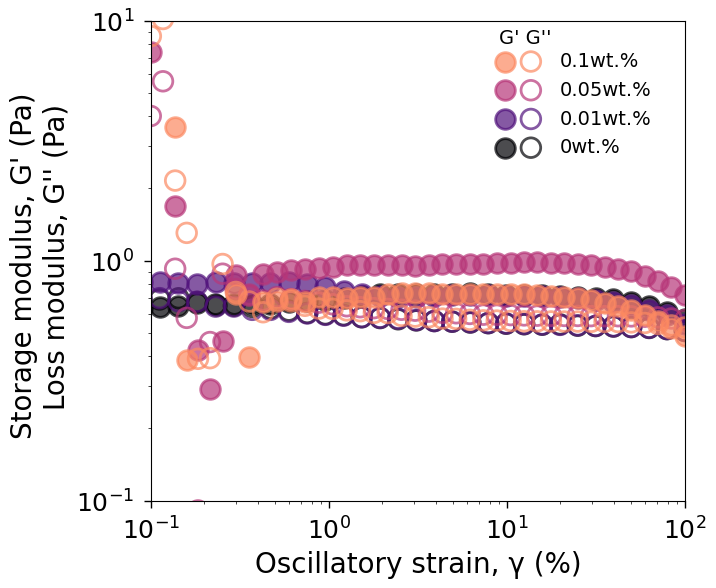

In [16]:
cmap = plt.get_cmap('magma')

fig, ax = plt.subplots(figsize=(6, 6))

for idx, (x, y1, y2, label1, label2) in enumerate(zip(cnf0WLM_r2_strain_25, cnf0WLM_r2_g1_25, cnf0WLM_r2_g2_25, CNF_g1_label, CNF_g2_label)):
    if idx < 4:
        c = cmap(float(idx) / len(os_strain_WLM_r2))
        scatter1 = plt.scatter(x, y1, c=np.atleast_2d(c), s =200, alpha = 0.7,
                    marker='o', facecolors=c, edgecolors=c, linewidths=2, label=label1)
        scatter2 = plt.scatter(x, y2, c=np.atleast_2d(c), s =200, alpha = 0.7,
                    marker='o', edgecolors=c, linewidths=2, label=label2)
        scatter2.set_facecolor('none')
 

plt.style.use('seaborn-notebook')
#plt.rcParams['font.family'] = 'Arial'
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Oscillatory strain, γ (%)', fontsize=20)
plt.ylabel("Storage modulus, G' (Pa) \n Loss modulus, G'' (Pa)", fontsize=20)

legend_handles = [(scatter1, scatter2) for scatter1, scatter2 in zip(scatter1.get_paths(), scatter2.get_paths())]
legend_labels = WLM_r2_label_g2 

handler_map = {}
for handle, label in zip(legend_handles, legend_labels):
    handler_map[handle] = HandlerTuple(ndivide=None, pad=0.3)

handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[1::2] + handles[::2]  # Combine G1 and G2 handles
labels =  labels[1::2] + labels[::2]   # Combine G1 and G2 labels

label_colors = ['white' if i < 4 else 'black' for i in range(len(labels))]
legend = plt.legend(handles[::-1], labels[::-1], frameon=False, fontsize=14, 
                    handler_map=handler_map, labelcolor=label_colors, ncol =2,
                    handlelength=-5, handletextpad=4, loc = (0.74, 0.7))

plt.subplots_adjust(left=0.01, right=0.9, top=0.9, bottom=0.1)  # Adjust the values as needed
 
plt.text(9, 8, "G' G''", fontsize=14, color='black')

plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(0.1, 100)
plt.ylim(0.1, 10)
#plt.savefig("Amplitude Sweeps of WLM(CTAB&NaSal) at 25C.png", dpi=1500, bbox_inches='tight')
plt.show()

NameError: name 'handle2' is not defined

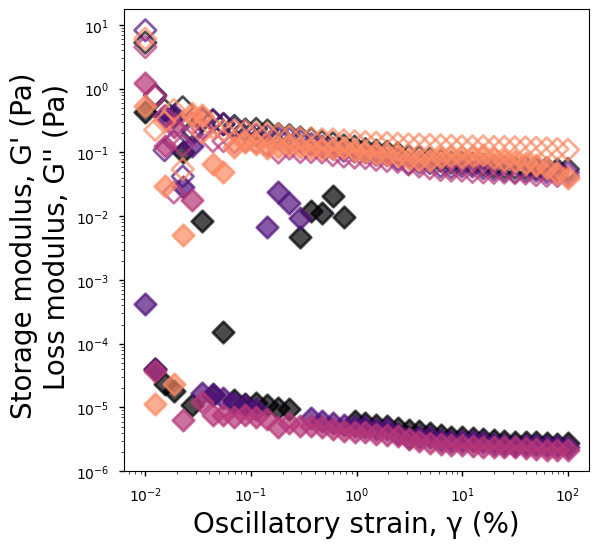

In [17]:
cmap = plt.get_cmap('magma')

fig, ax = plt.subplots(figsize=(6, 6))

for idx, (x, y1, y2, label1, label2) in enumerate(zip(cnf0WLM_r2_strain_50, cnf0WLM_r2_g1_50, cnf0WLM_r2_g2_50, CNF_g1_label, CNF_g2_label)):
    if idx < 4:
        c = cmap(float(idx) / len(os_strain_WLM_r2))
        scatter3 = plt.scatter(x, y1, c=np.atleast_2d(c), s =120, alpha = 0.7,
                    marker='D', facecolors=c, edgecolors=c, linewidths=2, label=label1)
        scatter4 = plt.scatter(x, y2, c=np.atleast_2d(c), s =120, alpha = 0.7,
                    marker='D', edgecolors=c, linewidths=2, label=label2)
        scatter4.set_facecolor('none') 
 

plt.style.use('seaborn-notebook')
#plt.rcParams['font.family'] = 'Arial'
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Oscillatory strain, γ (%)', fontsize=20)
plt.ylabel("Storage modulus, G' (Pa) \n Loss modulus, G'' (Pa)", fontsize=20)

legend_handles_2 = [(scatter3, scatter4) for scatter3, scatter4 in zip(scatter3.get_paths(), scatter4.get_paths())]
legend_labels = WLM_r2_label_g2 

handler_map = {}
for handle, label in zip(legend_handles, legend_labels):
    handler_map[handle, handle2] = HandlerTuple(ndivide=None, pad=0.3)

handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[1::2] + handles[::2]  # Combine G1 and G2 handles
labels =  labels[1::2] + labels[::2]   # Combine G1 and G2 labels

label_colors = ['white' if i < 4 else 'black' for i in range(len(labels))]
legend = plt.legend(handles[::-1], labels[::-1], frameon=False, fontsize=14, 
                    handler_map=handler_map, labelcolor=label_colors, ncol =2,
                    handlelength=-5, handletextpad=4, loc = (0.74, 0.7))

plt.subplots_adjust(left=0.01, right=0.9, top=0.9, bottom=0.1)  # Adjust the values as needed
 
plt.text(9, 8, "G' G''", fontsize=14, color='black')

plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(0.1, 100)
#plt.ylim(0.1, 10)
#plt.savefig("Amplitude Sweeps of WLM(CTAB&NaSal) at 50C.png", dpi=1500, bbox_inches='tight')
plt.show()

In [ ]:
cmap = plt.get_cmap('magma')

fig, ax = plt.subplots(figsize=(6, 6))

for idx, (x, y1, y2, label1, label2) in enumerate(zip(cnf0WLM_r2_strain_25, cnf0WLM_r2_g1_25, cnf0WLM_r2_g2_25, CNF_g1_label, CNF_g2_label)):
    if idx < 4:
        c = cmap(float(idx) / len(os_strain_WLM_r2))
        scatter1 = plt.scatter(x, y1, c=np.atleast_2d(c), s =150, alpha = 0.5,
                    marker='o', facecolors=c, edgecolors=c, linewidths=2, label=label1)
        scatter2 = plt.scatter(x, y2, c=np.atleast_2d(c), s =150, alpha = 0.5,
                    marker='o', edgecolors=c, linewidths=2, label=label2)
        scatter2.set_facecolor('none') 

for idx, (x, y1, y2, label1, label2) in enumerate(zip(cnf0WLM_r2_strain_50, cnf0WLM_r2_g1_50, cnf0WLM_r2_g2_50, CNF_g1_label, CNF_g2_label)):
    if idx < 4:
        c = cmap(float(idx) / len(os_strain_WLM_r2))
        scatter3 = plt.scatter(x, y1, c=np.atleast_2d(c), s =150, alpha = 0.7,
                    marker='D', facecolors=c, edgecolors=c, linewidths=2, label=label1)
        scatter4 = plt.scatter(x, y2, c=np.atleast_2d(c), s =150, alpha = 0.7,
                    marker='D', edgecolors=c, linewidths=2, label=label1)
        scatter4.set_facecolor('none') 
 

plt.style.use('seaborn-notebook')
#plt.rcParams['font.family'] = 'Arial'
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Oscillatory strain, γ (%)', fontsize=20)
plt.ylabel("Storage modulus, G' (Pa) \n Loss modulus, G'' (Pa)", fontsize=20)

legend_handles = [(scatter1, scatter2) for scatter1, scatter2 in zip(scatter1.get_paths(), scatter2.get_paths())]
legend_handles_2 = [(scatter3, scatter4) for scatter3, scatter4 in zip(scatter3.get_paths(), scatter4.get_paths())]
legend_labels = WLM_r2_label_g2 

handler_map = {}
for handle, handle2, label in zip(legend_handles, legend_handles_2, legend_labels):
    handler_map[handle, handle2] = HandlerTuple(ndivide=None, pad=0.3)

handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[1::2] + handles[::2]  # Combine G1 and G2 handles
labels =  labels[1::2] + labels[::2]   # Combine G1 and G2 labels

label_colors = ['white' if i < 12 else 'black' for i in range(len(labels))]
legend = plt.legend(handles[::-1], labels[::-1], frameon=False, fontsize=14, 
                    handler_map=handler_map, labelcolor=label_colors, ncol =4,
                    handlelength=-4, handletextpad=4, loc = (0.55, 0.2))

plt.subplots_adjust(left=0.01, right=0.9, top=0.9, bottom=0.1)  # Adjust the values as needed
 
plt.text(3.5, 0.004, "G'             G''", fontsize=14, color='black')
plt.text(2, 0.002, "(50$^\circ$C)(25$^\circ$C)(50$^\circ$C)(25$^\circ$C)", fontsize=10, color='black')

plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(0.1, 100)
#plt.ylim(0.1, 10)
#plt.savefig("Amplitude Sweeps of WLM(CTAB&NaSal) at 25C and 50C.png", dpi=1500, bbox_inches='tight')
plt.show()

In [18]:
cnf0WLM_f_r2_25_fre = cnf0WLM_f_r2_25.iloc[1:42, 3].astype(float)
cnf0WLM_f_r2_25_g1 = cnf0WLM_f_r2_25.iloc[1:42, 4].astype(float)
cnf0WLM_f_r2_25_g2 = cnf0WLM_f_r2_25.iloc[1:42, 5].astype(float)

cnf0WLM_f_r2_50_fre = cnf0WLM_f_r2_50.iloc[1:42, 3].astype(float)
cnf0WLM_f_r2_50_g1 = cnf0WLM_f_r2_50.iloc[1:42, 4].astype(float)
cnf0WLM_f_r2_50_g2 = cnf0WLM_f_r2_50.iloc[1:42, 5].astype(float)

cnf001WLM_f_r2_25_fre= cnf001WLM_f_r2_25.iloc[1:42, 3].astype(float)
cnf001WLM_f_r2_25_g1 = cnf001WLM_f_r2_25.iloc[1:42, 4].astype(float)
cnf001WLM_f_r2_25_g2 = cnf001WLM_f_r2_25.iloc[1:42, 5].astype(float)

cnf001WLM_f_r2_50_fre= cnf001WLM_f_r2_50.iloc[1:42, 3].astype(float)
cnf001WLM_f_r2_50_g1 = cnf001WLM_f_r2_50.iloc[1:42, 4].astype(float)
cnf001WLM_f_r2_50_g2 = cnf001WLM_f_r2_50.iloc[1:42, 5].astype(float)

cnf005WLM_f_r2_25_fre = cnf005WLM_f_r2_25.iloc[1:42, 3].astype(float)
cnf005WLM_f_r2_25_g1 = cnf005WLM_f_r2_25.iloc[1:42, 4].astype(float)
cnf005WLM_f_r2_25_g2 = cnf005WLM_f_r2_25.iloc[1:42, 5].astype(float)

cnf005WLM_f_r2_50_fre = cnf005WLM_f_r2_50.iloc[1:42, 3].astype(float)
cnf005WLM_f_r2_50_g1 = cnf005WLM_f_r2_50.iloc[1:42, 4].astype(float)
cnf005WLM_f_r2_50_g2 = cnf005WLM_f_r2_50.iloc[1:42, 5].astype(float)

cnf01WLM_f_r2_25_fre = cnf01WLM_f_r2_25.iloc[1:42, 3].astype(float)
cnf01WLM_f_r2_25_g1 = cnf01WLM_f_r2_25.iloc[1:42, 4].astype(float)
cnf01WLM_f_r2_25_g2 = cnf01WLM_f_r2_25.iloc[1:42, 5].astype(float)

cnf01WLM_f_r2_50_fre = cnf01WLM_f_r2_50.iloc[1:42, 3].astype(float)
cnf01WLM_f_r2_50_g1 = cnf01WLM_f_r2_50.iloc[1:42, 4].astype(float)
cnf01WLM_f_r2_50_g2 = cnf01WLM_f_r2_50.iloc[1:42, 5].astype(float)

In [21]:
cnf0WLM_r2_f_fre_T = [cnf0WLM_f_r2_25_fre, cnf0WLM_f_r2_50_fre]
cnf001WLM_r2_f_fre_T = [cnf001WLM_f_r2_25_fre, cnf001WLM_f_r2_50_fre]
cnf005WLM_r2_f_fre_T = [cnf005WLM_f_r2_25_fre, cnf005WLM_f_r2_50_fre]
cnf01WLM_r2_f_fre_T = [cnf01WLM_f_r2_25_fre, cnf01WLM_f_r2_50_fre]

cnf0WLM_r2_g1_f_T = [cnf0WLM_f_r2_25_g1, cnf0WLM_f_r2_50_g1]
cnf0WLM_r2_g2_f_T = [cnf0WLM_f_r2_25_g2, cnf0WLM_f_r2_50_g2]

cnf001WLM_r2_g1_f_T = [cnf001WLM_f_r2_25_g1, cnf001WLM_f_r2_50_g1]
cnf001WLM_r2_g2_f_T = [cnf001WLM_f_r2_25_g2, cnf001WLM_f_r2_50_g2]

cnf005WLM_r2_g1_f_T = [cnf005WLM_f_r2_25_g1, cnf005WLM_f_r2_50_g1]
cnf005WLM_r2_g2_f_T = [cnf005WLM_f_r2_25_g2, cnf005WLM_f_r2_50_g2]

cnf01WLM_r2_g1_f_T = [cnf01WLM_f_r2_25_g1, cnf01WLM_f_r2_50_g1]
cnf01WLM_r2_g2_f_T = [cnf01WLM_f_r2_25_g2, cnf01WLM_f_r2_50_g2]

T_g1_label = ['.', '.']
#T_g2_label = ['25($^\circ$C)', '50($^\circ$C)']
T_g2_label = ['25','50']
#______________________________________________________________________________

cnf0WLM_r2_fre_25 = [cnf0WLM_f_r2_25_fre, cnf001WLM_f_r2_25_fre, cnf005WLM_f_r2_25_fre, cnf01WLM_f_r2_25_fre]
cnf0WLM_r2_fre_50 = [cnf0WLM_f_r2_50_fre, cnf001WLM_f_r2_50_fre, cnf005WLM_f_r2_50_fre, cnf01WLM_f_r2_50_fre]

cnf0WLM_r2_g1_f_25 = [cnf0WLM_f_r2_25_g1, cnf001WLM_f_r2_25_g1, cnf005WLM_f_r2_25_g1, cnf01WLM_f_r2_25_g1]
cnf0WLM_r2_g1_f_50 = [cnf0WLM_f_r2_50_g1, cnf001WLM_f_r2_50_g1, cnf005WLM_f_r2_50_g1, cnf01WLM_f_r2_50_g1]

cnf0WLM_r2_g2_f_25 = [cnf0WLM_f_r2_25_g2, cnf001WLM_f_r2_25_g2, cnf005WLM_f_r2_25_g2, cnf01WLM_f_r2_25_g2]
cnf0WLM_r2_g2_f_50 = [cnf0WLM_f_r2_50_g2, cnf001WLM_f_r2_50_g2, cnf005WLM_f_r2_50_g2, cnf01WLM_f_r2_50_g2]

CNF_g1_label = ['.', '.', '.', '.']
CNF_g2_label = ['0wt.%', '0.01wt.%', '0.05wt.%', '0.1wt.%']

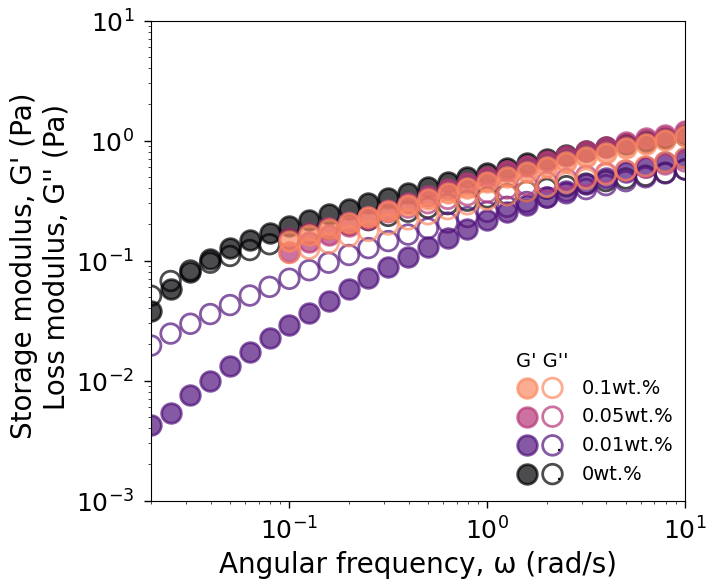

In [111]:
cmap = plt.get_cmap('magma')

fig, ax = plt.subplots(figsize=(6, 6))

for idx, (x, y1, y2, label1, label2) in enumerate(zip(cnf0WLM_r2_fre_25, cnf0WLM_r2_g1_f_25, cnf0WLM_r2_g2_f_25, CNF_g1_label, CNF_g2_label)):
    if idx < 4:
        c = cmap(float(idx) / len(os_strain_WLM_r2))
        scatter1 = plt.scatter(x, y1, c=np.atleast_2d(c), s =200, alpha = 0.7,
                    marker='o', facecolors=c, edgecolors=c, linewidths=2, label=label1)
        scatter2 = plt.scatter(x, y2, c=np.atleast_2d(c), s =200, alpha = 0.7,
                    marker='o', edgecolors=c, linewidths=2, label=label2)
        scatter2.set_facecolor('none') 
 

plt.style.use('seaborn-notebook')
#plt.rcParams['font.family'] = 'Arial'
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Angular frequency, \u03C9 (rad/s)', fontsize=20)
plt.ylabel("Storage modulus, G' (Pa) \n Loss modulus, G'' (Pa)", fontsize=20)

legend_handles = [(scatter1, scatter2) for scatter1, scatter2 in zip(scatter1.get_paths(), scatter2.get_paths())]
legend_labels = CNF_g2_label

handler_map = {}
for handle, label in zip(legend_handles, legend_labels):
    handler_map[handle] = HandlerTuple(ndivide=None, pad=0.3)

handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[1::2] + handles[::2]  # Combine G1 and G2 handles
labels =  labels[1::2] + labels[::2]   # Combine G1 and G2 labels

label_colors = ['white' if i < 2 else 'black' for i in range(len(labels))]
legend = plt.legend(handles[::-1], labels[::-1], frameon=False, fontsize=14, 
                    handler_map=handler_map, labelcolor=label_colors, ncol =2,
                    handlelength=-5, handletextpad=4, loc = (0.78,0.02))

plt.subplots_adjust(left=0.01, right=0.9, top=0.9, bottom=0.1)  # Adjust the values as needed
 
plt.text(1.4, 0.013, "G' G''", fontsize=14, color='black')

plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(0.02, 10)
plt.ylim(1e-3, 10)
#plt.savefig("Frequency Sweeps of WLM(CTAB&NaSal) at 25C_Second Data Sets 0 and 0.1.png", dpi=1500, bbox_inches='tight')
plt.show()

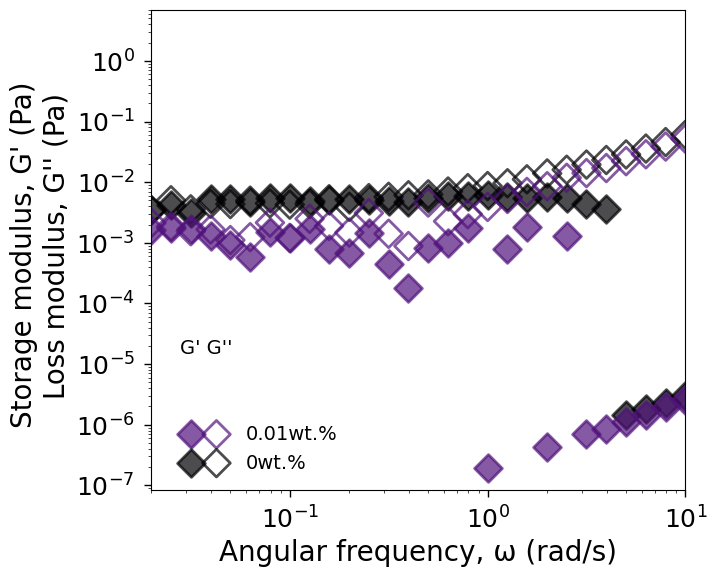

In [56]:
cmap = plt.get_cmap('magma')

fig, ax = plt.subplots(figsize=(6, 6))

for idx, (x, y1, y2, label1, label2) in enumerate(zip(cnf0WLM_r2_fre_50, cnf0WLM_r2_g1_f_50, cnf0WLM_r2_g2_f_50, CNF_g1_label, CNF_g2_label)):
    if idx < 2:
        c = cmap(float(idx) / len(os_strain_WLM_r2))
        scatter1 = plt.scatter(x, y1, c=np.atleast_2d(c), s =200, alpha = 0.7,
                    marker='D', facecolors=c, edgecolors=c, linewidths=2, label=label1)
        scatter2 = plt.scatter(x, y2, c=np.atleast_2d(c), s =200, alpha = 0.7,
                    marker='D', edgecolors=c, linewidths=2, label=label2)
        scatter2.set_facecolor('none') 
 

plt.style.use('seaborn-notebook')
#plt.rcParams['font.family'] = 'Arial'
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Angular frequency, \u03C9 (rad/s)', fontsize=20)
plt.ylabel("Storage modulus, G' (Pa) \n Loss modulus, G'' (Pa)", fontsize=20)

legend_handles = [(scatter1, scatter2) for scatter1, scatter2 in zip(scatter1.get_paths(), scatter2.get_paths())]
legend_labels = CNF_g2_label

handler_map = {}
for handle, label in zip(legend_handles, legend_labels):
    handler_map[handle, handle2] = HandlerTuple(ndivide=None, pad=0.3)

handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[1::2] + handles[::2]  # Combine G1 and G2 handles
labels =  labels[1::2] + labels[::2]   # Combine G1 and G2 labels

label_colors = ['white' if i < 2 else 'black' for i in range(len(labels))]
legend = plt.legend(handles[::-1], labels[::-1], frameon=False, fontsize=14, 
                    handler_map=handler_map, labelcolor=label_colors, ncol =2,
                    handlelength=-5, handletextpad=4, loc = (0.15,0.02))

plt.subplots_adjust(left=0.01, right=0.9, top=0.9, bottom=0.1)  # Adjust the values as needed
 
plt.text(0.028, 0.000015, "G' G''", fontsize=14, color='black')

plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(0.02, 10)
#plt.ylim(1e-3, 10)
#plt.savefig("Frequency Sweeps of WLM(CTAB&NaSal) at 50C_Second Data Sets 0 and 0.01.png", dpi=1500, bbox_inches='tight')
plt.show()

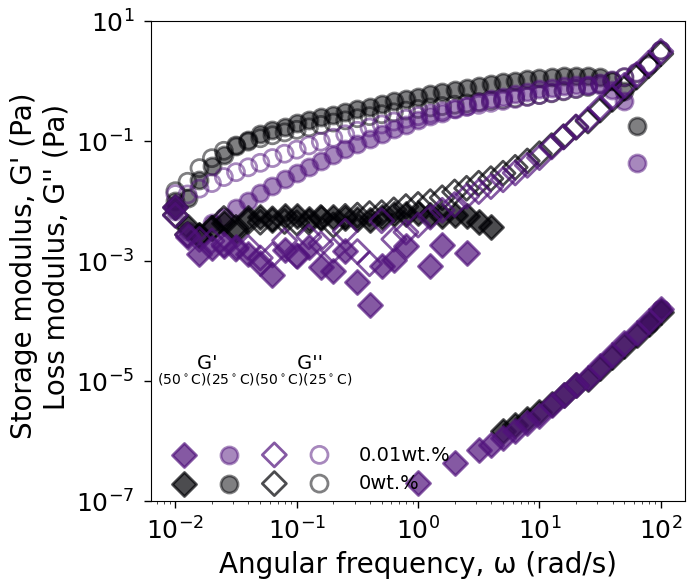

In [61]:

cmap = plt.get_cmap('magma')

fig, ax = plt.subplots(figsize=(6, 6))

for idx, (x, y1, y2, label1, label2) in enumerate(zip(cnf0WLM_r2_fre_25, cnf0WLM_r2_g1_f_25, cnf0WLM_r2_g2_f_25, CNF_g1_label, CNF_g2_label)):
    if idx < 2:
        c = cmap(float(idx) / len(os_strain_WLM_r2))
        scatter1 = plt.scatter(x, y1, c=np.atleast_2d(c), s =150, alpha = 0.5,
                    marker='o', facecolors=c, edgecolors=c, linewidths=2, label=label1)
        scatter2 = plt.scatter(x, y2, c=np.atleast_2d(c), s =150, alpha = 0.5,
                    marker='o', edgecolors=c, linewidths=2, label=label2)
        scatter2.set_facecolor('none') 

for idx, (x, y1, y2, label1, label2) in enumerate(zip(cnf0WLM_r2_fre_50, cnf0WLM_r2_g1_f_50, cnf0WLM_r2_g2_f_50, CNF_g1_label, CNF_g2_label)):
    if idx < 2:
        c = cmap(float(idx) / len(os_strain_WLM_r2))
        scatter3 = plt.scatter(x, y1, c=np.atleast_2d(c), s =150, alpha = 0.7,
                    marker='D', facecolors=c, edgecolors=c, linewidths=2, label=label1)
        scatter4 = plt.scatter(x, y2, c=np.atleast_2d(c), s =150, alpha = 0.7,
                    marker='D', edgecolors=c, linewidths=2, label=label1)
        scatter4.set_facecolor('none') 
 

plt.style.use('seaborn-notebook')
#plt.rcParams['font.family'] = 'Arial'
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Angular frequency, \u03C9 (rad/s)', fontsize=20)
plt.ylabel("Storage modulus, G' (Pa) \n Loss modulus, G'' (Pa)", fontsize=20)

legend_handles = [(scatter1, scatter2) for scatter1, scatter2 in zip(scatter1.get_paths(), scatter2.get_paths())]
legend_handles_2 = [(scatter3, scatter4) for scatter3, scatter4 in zip(scatter3.get_paths(), scatter4.get_paths())]
legend_labels = CNF_g2_label

handler_map = {}
for handle, handle2, label in zip(legend_handles, legend_handles_2, legend_labels):
    handler_map[handle, handle2] = HandlerTuple(ndivide=None, pad=0.3)

handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[1::2] + handles[::2]  # Combine G1 and G2 handles
labels =  labels[1::2] + labels[::2]   # Combine G1 and G2 labels

label_colors = ['white' if i < 6 else 'black' for i in range(len(labels))]
legend = plt.legend(handles[::-1], labels[::-1], frameon=False, fontsize=14, 
                    handler_map=handler_map, labelcolor=label_colors, ncol =4,
                    handlelength=-4, handletextpad=4, loc = (0.12, 0.0002))

plt.subplots_adjust(left=0.01, right=0.9, top=0.9, bottom=0.1)  # Adjust the values as needed
 
plt.text(0.015, 0.000016, "G'             G''", fontsize=14, color='black')
plt.text(0.007, 0.000009, "(50$^\circ$C)(25$^\circ$C)(50$^\circ$C)(25$^\circ$C)", fontsize=10, color='black')

plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.xlim(0.1, 100)
plt.ylim(1e-7, 10)
#plt.savefig("Frequency Sweeps of WLM(CTAB&NaSal) at compared T Second Data Sets 0 and 0.01.png", dpi=1500, bbox_inches='tight')
plt.show()

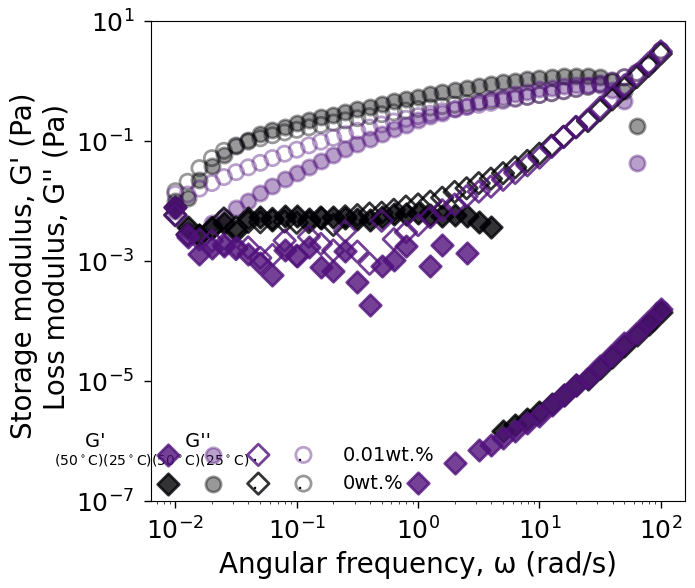

In [26]:
cmap = plt.get_cmap('magma')

fig, ax = plt.subplots(figsize=(6, 6))

for idx, (x, y1, y2, label1, label2) in enumerate(zip(cnf0WLM_r2_fre_25, cnf0WLM_r2_g1_f_25, cnf0WLM_r2_g2_f_25, CNF_g1_label, CNF_g2_label)):
    if idx < 2:
        c = cmap(float(idx) / len(os_strain_WLM_r2))
        scatter1 = plt.scatter(x, y1, c=np.atleast_2d(c), s =120, alpha = 0.4,
                    marker='o', facecolors=c, edgecolors=c, linewidths=2, label=label1)
        scatter2 = plt.scatter(x, y2, c=np.atleast_2d(c), s =120, alpha = 0.4,
                    marker='o', edgecolors=c, linewidths=2, label=label2)
        scatter2.set_facecolor('none') 

for idx, (x, y1, y2, label1, label2) in enumerate(zip(cnf0WLM_r2_fre_50, cnf0WLM_r2_g1_f_50, cnf0WLM_r2_g2_f_50, CNF_g1_label, CNF_g2_label)):
    if idx < 2:
        c = cmap(float(idx) / len(os_strain_WLM_r2))
        scatter3 = plt.scatter(x, y1, c=np.atleast_2d(c), s =120, alpha = 0.8,
                    marker='D', facecolors=c, edgecolors=c, linewidths=2, label=label1)
        scatter4 = plt.scatter(x, y2, c=np.atleast_2d(c), s =120, alpha = 0.8,
                    marker='D', edgecolors=c, linewidths=2, label=label1)
        scatter4.set_facecolor('none') 
 

plt.style.use('seaborn-notebook')
#plt.rcParams['font.family'] = 'Arial'
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Angular frequency, \u03C9 (rad/s)', fontsize=20)
plt.ylabel("Storage modulus, G' (Pa) \n Loss modulus, G'' (Pa)", fontsize=20)

legend_handles = [(scatter1, scatter2) for scatter1, scatter2 in zip(scatter1.get_paths(), scatter2.get_paths())]
legend_handles_2 = [(scatter3, scatter4) for scatter3, scatter4 in zip(scatter3.get_paths(), scatter4.get_paths())]
legend_labels = WLM_r2_label_g2 

handler_map = {}
for handle, handle2, label in zip(legend_handles, legend_handles_2, legend_labels):
    handler_map[handle, handle2] = HandlerTuple(ndivide=None, pad=0.3)

handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[1::2] + handles[::2]  # Combine G1 and G2 handles
labels =  labels[1::2] + labels[::2]   # Combine G1 and G2 labels

label_colors = ['white' if i < 2 else 'black' for i in range(len(labels))]
legend = plt.legend(handles[::-1], labels[::-1], frameon=False, fontsize=14, 
                    handler_map=handler_map, labelcolor=label_colors, ncol =4,
                    handlelength=-4, handletextpad=4, loc = (0.09, 0.0002))

plt.subplots_adjust(left=0.01, right=0.9, top=0.9, bottom=0.1)  # Adjust the values as needed
 
plt.text(0.0018, 0.0000008, "G'             G''", fontsize=14, color='black')
plt.text(0.001, 0.0000004, "(50$^\circ$C)(25$^\circ$C)(50$^\circ$C)(25$^\circ$C)", fontsize=10, color='black')

plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.xlim(0.1, 100)
plt.ylim(1e-7, 10)
#plt.savefig("Amplitude Sweeps of CNF Suspensions with Ion Specificity (50mM).png", dpi=1500, bbox_inches='tight')
plt.show()

In [ ]:
# Combine the first data set at 25C to 50C (These samples are different) - NEED TO BE REMEASURed

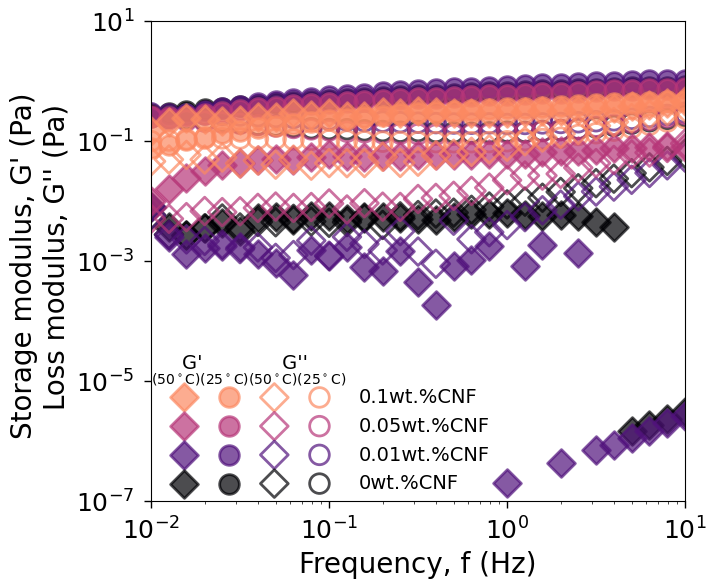

In [402]:
ang_fre_WLM_r2 = [cnf0WLM_f_r2_fre, cnf001WLM_f_r2_fre, cnf005WLM_f_r2_fre, cnf01WLM_f_r2_fre]
WLM_f_r2_g1 = [cnf0WLM_f_r2_g1, cnf001WLM_f_r2_g1, cnf005WLM_f_r2_g1, cnf01WLM_f_r2_g1]
WLM_f_r2_g2 = [cnf0WLM_f_r2_g2, cnf001WLM_f_r2_g2, cnf005WLM_f_r2_g2, cnf01WLM_f_r2_g2]
WLM_f_r2_label_g1 = ['.', '.', '.','.']
WLM_f_r2_label_g2 = ['0wt.%CNF', '0.01wt.%CNF', '0.05wt.%CNF', '0.1wt.%CNF']

cmap = plt.get_cmap('magma')

# Plot the data
fig, ax = plt.subplots(figsize=(6, 6))

for idx, (x, y1, y2, label1, label2) in enumerate(zip(ang_fre_WLM_r2, WLM_f_r2_g1, WLM_f_r2_g2, WLM_f_r2_label_g1, WLM_f_r2_label_g2)):
    if idx < 4:
        c = cmap(float(idx) / len(ang_fre_WLM_r2))
        scatter1 = plt.scatter(x, y1, c=np.atleast_2d(c), s =200, alpha = 0.7,
                    marker='o', facecolors=c, edgecolors=c, linewidths=2, label=label1)
        scatter2 = plt.scatter(x, y2, c=np.atleast_2d(c), s =200, alpha = 0.7,
                    marker='o', edgecolors=c, linewidths=2, label=label2)
        scatter2.set_facecolor('none') 

for idx, (x, y1, y2, label1, label2) in enumerate(zip(cnf0WLM_r2_fre_50, cnf0WLM_r2_g1_f_50, cnf0WLM_r2_g2_f_50, CNF_g1_label, CNF_g2_label)):
    if idx < 4:
        c = cmap(float(idx) / len(os_strain_WLM_r2))
        scatter3 = plt.scatter(x, y1, c=np.atleast_2d(c), s =200, alpha = 0.7,
                    marker='D', facecolors=c, edgecolors=c, linewidths=2, label=label1)
        scatter4 = plt.scatter(x, y2, c=np.atleast_2d(c), s =200, alpha = 0.7,
                    marker='D', edgecolors=c, linewidths=2, label=label1)
        scatter4.set_facecolor('none') 

plt.style.use('seaborn-notebook')
#plt.rcParams['font.family'] = 'Arial'
plt.xscale("log")
plt.yscale("log")
#plt.xlabel('Angular frequency, \u03C9 (rad/s)', fontsize=20)
plt.xlabel('Frequency, f (Hz)', fontsize=20)
plt.ylabel("Storage modulus, G' (Pa) \n Loss modulus, G'' (Pa)", fontsize=20)

legend_handles = [(scatter1, scatter2) for scatter1, scatter2 in zip(scatter1.get_paths(), scatter2.get_paths())]
legend_handles_2 = [(scatter3, scatter4) for scatter3, scatter4 in zip(scatter3.get_paths(), scatter4.get_paths())]
legend_labels = WLM_r2_label_g2 

handler_map = {}
for handle, handle2, label in zip(legend_handles, legend_handles_2, legend_labels):
    handler_map[handle, handle2] = HandlerTuple(ndivide=None, pad=0.3)

handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[1::2] + handles[::2]  # Combine G1 and G2 handles
labels =  labels[1::2] + labels[::2]   # Combine G1 and G2 labels

label_colors = ['white' if i < 12 else 'black' for i in range(len(labels))]
legend = plt.legend(handles[::-1], labels[::-1], frameon=False, fontsize=14, 
                    handler_map=handler_map, labelcolor=label_colors, ncol =4,
                    handlelength=-4, handletextpad=4, loc = (0.12, 0.0002))

plt.subplots_adjust(left=0.01, right=0.9, top=0.9, bottom=0.1)  # Adjust the values as needed
 
plt.text(0.015, 0.000016, "G'             G''", fontsize=14, color='black')
plt.text(0.01, 0.000009, "(50$^\circ$C)(25$^\circ$C)(50$^\circ$C)(25$^\circ$C)", fontsize=10, color='black')

plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(0.0000001, 10)
plt.xlim(0.01, 10)
#plt.savefig("Frequency Sweeps WLM(CTAB&NaSal) Varying CNF Concentrations at 25C and 50C.png", dpi=1500, bbox_inches='tight')
plt.show()


# Ethoquad (C23) NaSal -> WLM

In [65]:
# WLM = 25mM Ehoquad and 12.5mM NaSal (r=2)
#cnf0WLM_ETQ072NaSal015 = pd.read_csv('/Users/ningravi/Desktop/Python/Raw Data WLM and CNF/6_30_23 Correct one/20230630_WLMs_0_025MCTAB0_0125MNaSal(made20230629) amplitude sweep.csv', header=None, skiprows=range(0, 9), encoding='utf-16', delimiter='\t')
cnf001WLM_ETQ036NaSal015 = pd.read_csv('/Users/ningravi/Desktop/Python/Raw Data WLM and CNF/7_24_23_ETQNaSal/2023727_cnf0_01ETQ0_36MNaSal0_15M_fre_2_amplitude.csv', header=None, skiprows=range(0, 9), encoding='utf-16', delimiter='\t')

In [66]:
cnf001WLM_ETQ036NaSal015_strain = cnf001WLM_ETQ036NaSal015.iloc[1:42, 7].astype(float)
cnf001WLM_ETQ036NaSal015_g1 = cnf001WLM_ETQ036NaSal015.iloc[1:42, 4].astype(float)
cnf001WLM_ETQ036NaSal015_g2 = cnf001WLM_ETQ036NaSal015.iloc[1:42, 5].astype(float)

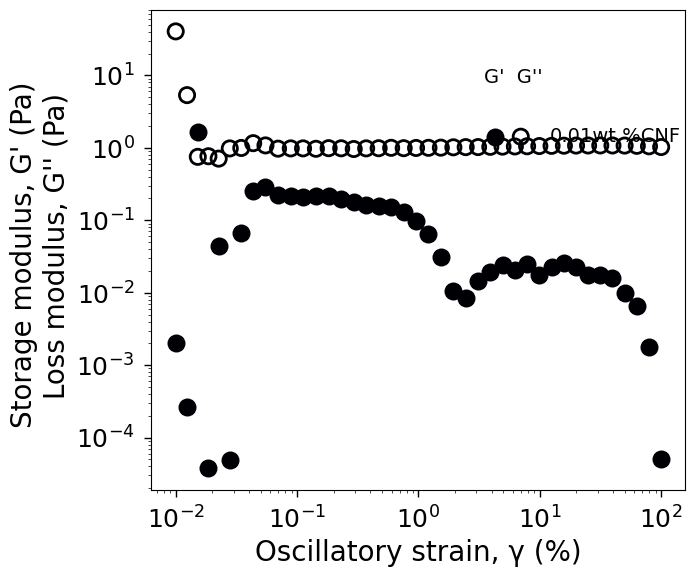

In [67]:
os_strain_cnf001WLM_ETQ036NaSal015 = [cnf001WLM_ETQ036NaSal015_strain]
WLM_ETQ036NaSal015_g1 = [cnf001WLM_ETQ036NaSal015_g1]
WLM_ETQ036NaSal015_g2 = [cnf001WLM_ETQ036NaSal015_g2]
WLM_ETQ036NaSal015_label_g1 = ['.']
WLM_ETQ036NaSal015_label_g2 = ['0.01wt.%CNF']

cmap = plt.get_cmap('magma')

# Plot the data
fig, ax = plt.subplots(figsize=(6, 6))

for idx, (x, y1, y2, label1, label2) in enumerate(zip(os_strain_cnf001WLM_ETQ036NaSal015, WLM_ETQ036NaSal015_g1, WLM_ETQ036NaSal015_g2, WLM_ETQ036NaSal015_label_g1, WLM_ETQ036NaSal015_label_g2)):
    c = cmap(float(idx) / len(os_strain_cnf001WLM_ETQ036NaSal015))
    scatter1 = plt.scatter(x, y1, c=np.atleast_2d(c), s =120, alpha = 1,
                marker='o', facecolors=c, edgecolors=c, linewidths=2, label=label1)
    scatter2 = plt.scatter(x, y2, c=np.atleast_2d(c), s =120, alpha = 1,
                marker='o', edgecolors=c, linewidths=2, label=label2)
    scatter2.set_facecolor('none') 
  

plt.style.use('seaborn-notebook')
#plt.rcParams['font.family'] = 'Arial'
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Oscillatory strain, γ (%)', fontsize=20)
plt.ylabel("Storage modulus, G' (Pa) \n Loss modulus, G'' (Pa)", fontsize=20)

legend_handles = [(scatter1, scatter2) for scatter1, scatter2 in zip(scatter1.get_paths(), scatter2.get_paths())]
legend_labels = WLM_r2_label_g2 

handler_map = {}
for handle, label in zip(legend_handles, legend_labels):
    handler_map[handle] = HandlerTuple(ndivide=None, pad=0.3)

handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[1::2] + handles[::2]  # Combine G1 and G2 handles
labels =  labels[1::2] + labels[::2]   # Combine G1 and G2 labels

label_colors = ['white' if i < 1 else 'black' for i in range(len(labels))]
legend = plt.legend(handles[::-1], labels[::-1], frameon=False, fontsize=14, 
           handler_map=handler_map, labelcolor=label_colors, ncol =2,
          handlelength=-5, handletextpad=4, loc = (0.72, 0.7))

plt.subplots_adjust(left=0.01, right=0.9, top=0.9, bottom=0.1)  # Adjust the values as needed
 
plt.text(3.5, 8, "G'  G''", fontsize=14, color='black')

plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.xlim(0.01, 10)
#plt.ylim(0.1, 10)
#plt.savefig("Amplitude Sweeps of CNF Suspensions with Ion Specificity (50mM).png", dpi=1500, bbox_inches='tight')
plt.show()

In [73]:
cnf0WLM_ETQ072NaSal015_f_5 = pd.read_csv('/Users/ningravi/Desktop/Python/Raw Data WLM and CNF/7_24_23_ETQNaSal/2023726_ETQ0_72MNaSal0_15M_fre actual_5.csv', header=None, skiprows=range(0, 9), encoding='utf-16', delimiter='\t')
cnf0WLM_ETQ072NaSal015_f_10 = pd.read_csv('/Users/ningravi/Desktop/Python/Raw Data WLM and CNF/7_24_23_ETQNaSal/2023726_ETQ0_72MNaSal0_15M_fre actual_10.csv', header=None, skiprows=range(0, 9), encoding='utf-16', delimiter='\t')
cnf0WLM_ETQ072NaSal015_f_15 = pd.read_csv('/Users/ningravi/Desktop/Python/Raw Data WLM and CNF/7_24_23_ETQNaSal/2023726_ETQ0_72MNaSal0_15M_fre actual_15.csv', header=None, skiprows=range(0, 9), encoding='utf-16', delimiter='\t')
cnf0WLM_ETQ072NaSal015_f_20 = pd.read_csv('/Users/ningravi/Desktop/Python/Raw Data WLM and CNF/7_24_23_ETQNaSal/2023726_ETQ0_72MNaSal0_15M_fre actual_20.csv', header=None, skiprows=range(0, 9), encoding='utf-16', delimiter='\t')
cnf0WLM_ETQ072NaSal015_f_25  = pd.read_csv('/Users/ningravi/Desktop/Python/Raw Data WLM and CNF/7_24_23_ETQNaSal/2023726_ETQ0_72MNaSal0_15M_fre actual_25.csv', header=None, skiprows=range(0, 9), encoding='utf-16', delimiter='\t')

cnf001WLM_ETQ036NaSal015_f_5 = pd.read_csv('/Users/ningravi/Desktop/Python/Raw Data WLM and CNF/7_24_23_ETQNaSal/2023727_cnf0_01ETQ0_36MNaSal0_15M_fre_2_5.csv', header=None, skiprows=range(0, 9), encoding='utf-16', delimiter='\t')
cnf001WLM_ETQ036NaSal015_f_10 = pd.read_csv('/Users/ningravi/Desktop/Python/Raw Data WLM and CNF/7_24_23_ETQNaSal/2023727_cnf0_01ETQ0_36MNaSal0_15M_fre_2_10.csv', header=None, skiprows=range(0, 9), encoding='utf-16', delimiter='\t')
cnf001WLM_ETQ036NaSal015_f_15 = pd.read_csv('/Users/ningravi/Desktop/Python/Raw Data WLM and CNF/7_24_23_ETQNaSal/2023727_cnf0_01ETQ0_36MNaSal0_15M_fre_2_15.csv', header=None, skiprows=range(0, 9), encoding='utf-16', delimiter='\t')
cnf001WLM_ETQ036NaSal015_f_20 = pd.read_csv('/Users/ningravi/Desktop/Python/Raw Data WLM and CNF/7_24_23_ETQNaSal/2023727_cnf0_01ETQ0_36MNaSal0_15M_fre_2_20.csv', header=None, skiprows=range(0, 9), encoding='utf-16', delimiter='\t')
cnf001WLM_ETQ036NaSal015_f_25 = pd.read_csv('/Users/ningravi/Desktop/Python/Raw Data WLM and CNF/7_24_23_ETQNaSal/2023727_cnf0_01ETQ0_36MNaSal0_15M_fre_2_25.csv', header=None, skiprows=range(0, 9), encoding='utf-16', delimiter='\t')

In [74]:
cnf0WLM_ETQ072NaSal015_f_5_fre = cnf0WLM_ETQ072NaSal015_f_5.iloc[1:42, 2].astype(float)
cnf0WLM_ETQ072NaSal015_f_5_fre_rads = cnf0WLM_ETQ072NaSal015_f_5.iloc[1:42, 3].astype(float)
cnf0WLM_ETQ072NaSal015_f_5_g1 = cnf0WLM_ETQ072NaSal015_f_5.iloc[1:42, 4].astype(float)
cnf0WLM_ETQ072NaSal015_f_5_g2 = cnf0WLM_ETQ072NaSal015_f_5.iloc[1:42, 5].astype(float)

cnf0WLM_ETQ072NaSal015_f_10_fre = cnf0WLM_ETQ072NaSal015_f_10.iloc[1:42, 2].astype(float)
cnf0WLM_ETQ072NaSal015_f_10_fre_rads = cnf0WLM_ETQ072NaSal015_f_10.iloc[1:42, 3].astype(float)
cnf0WLM_ETQ072NaSal015_f_10_g1 = cnf0WLM_ETQ072NaSal015_f_10.iloc[1:42, 4].astype(float)
cnf0WLM_ETQ072NaSal015_f_10_g2 = cnf0WLM_ETQ072NaSal015_f_10.iloc[1:42, 5].astype(float)

cnf0WLM_ETQ072NaSal015_f_15_fre = cnf0WLM_ETQ072NaSal015_f_15.iloc[1:42, 2].astype(float)
cnf0WLM_ETQ072NaSal015_f_15_fre_rads = cnf0WLM_ETQ072NaSal015_f_15.iloc[1:42, 3].astype(float)
cnf0WLM_ETQ072NaSal015_f_15_g1 = cnf0WLM_ETQ072NaSal015_f_15.iloc[1:42, 4].astype(float)
cnf0WLM_ETQ072NaSal015_f_15_g2 = cnf0WLM_ETQ072NaSal015_f_15.iloc[1:42, 5].astype(float)

cnf0WLM_ETQ072NaSal015_f_20_fre = cnf0WLM_ETQ072NaSal015_f_20.iloc[1:42, 2].astype(float)
cnf0WLM_ETQ072NaSal015_f_20_fre_rads = cnf0WLM_ETQ072NaSal015_f_20.iloc[1:42, 3].astype(float)
cnf0WLM_ETQ072NaSal015_f_20_g1 = cnf0WLM_ETQ072NaSal015_f_20.iloc[1:42, 4].astype(float)
cnf0WLM_ETQ072NaSal015_f_20_g2 = cnf0WLM_ETQ072NaSal015_f_20.iloc[1:42, 5].astype(float)

cnf0WLM_ETQ072NaSal015_f_25_fre = cnf0WLM_ETQ072NaSal015_f_25.iloc[1:42, 2].astype(float)
cnf0WLM_ETQ072NaSal015_f_25_fre_rads = cnf0WLM_ETQ072NaSal015_f_25.iloc[1:42, 3].astype(float)
cnf0WLM_ETQ072NaSal015_f_25_g1 = cnf0WLM_ETQ072NaSal015_f_25.iloc[1:42, 4].astype(float)
cnf0WLM_ETQ072NaSal015_f_25_g2 = cnf0WLM_ETQ072NaSal015_f_25.iloc[1:42, 5].astype(float)

cnf001WLM_ETQ036NaSal015_f_5_fre = cnf001WLM_ETQ036NaSal015_f_5.iloc[1:42, 2].astype(float)
cnf001WLM_ETQ036NaSal015_f_5_fre_rads = cnf001WLM_ETQ036NaSal015_f_5.iloc[1:42, 3].astype(float)
cnf001WLM_ETQ036NaSal015_f_5_g1 = cnf001WLM_ETQ036NaSal015_f_5.iloc[1:42, 4].astype(float)
cnf001WLM_ETQ036NaSal015_f_5_g2 = cnf001WLM_ETQ036NaSal015_f_5.iloc[1:42, 5].astype(float)

cnf001WLM_ETQ036NaSal015_f_10_fre = cnf001WLM_ETQ036NaSal015_f_10.iloc[1:42, 2].astype(float)
cnf001WLM_ETQ036NaSal015_f_10_fre_rads = cnf001WLM_ETQ036NaSal015_f_10.iloc[1:42, 3].astype(float)
cnf001WLM_ETQ036NaSal015_f_10_g1 = cnf001WLM_ETQ036NaSal015_f_10.iloc[1:42, 4].astype(float)
cnf001WLM_ETQ036NaSal015_f_10_g2 = cnf001WLM_ETQ036NaSal015_f_10.iloc[1:42, 5].astype(float)

cnf001WLM_ETQ036NaSal015_f_15_fre = cnf001WLM_ETQ036NaSal015_f_15.iloc[1:42, 2].astype(float)
cnf001WLM_ETQ036NaSal015_f_15_fre_rads = cnf001WLM_ETQ036NaSal015_f_15.iloc[1:42, 3].astype(float)
cnf001WLM_ETQ036NaSal015_f_15_g1 = cnf001WLM_ETQ036NaSal015_f_15.iloc[1:42, 4].astype(float)
cnf001WLM_ETQ036NaSal015_f_15_g2 = cnf001WLM_ETQ036NaSal015_f_15.iloc[1:42, 5].astype(float)

cnf001WLM_ETQ036NaSal015_f_20_fre = cnf001WLM_ETQ036NaSal015_f_20.iloc[1:42, 2].astype(float)
cnf001WLM_ETQ036NaSal015_f_20_fre_rads = cnf001WLM_ETQ036NaSal015_f_20.iloc[1:42, 3].astype(float)
cnf001WLM_ETQ036NaSal015_f_20_g1 = cnf001WLM_ETQ036NaSal015_f_20.iloc[1:42, 4].astype(float)
cnf001WLM_ETQ036NaSal015_f_20_g2 = cnf001WLM_ETQ036NaSal015_f_20.iloc[1:42, 5].astype(float)

cnf001WLM_ETQ036NaSal015_f_25_fre = cnf001WLM_ETQ036NaSal015_f_25.iloc[1:42, 2].astype(float)
cnf001WLM_ETQ036NaSal015_f_25_fre_rads = cnf001WLM_ETQ036NaSal015_f_25.iloc[1:42, 3].astype(float)
cnf001WLM_ETQ036NaSal015_f_25_g1 = cnf001WLM_ETQ036NaSal015_f_25.iloc[1:42, 4].astype(float)
cnf001WLM_ETQ036NaSal015_f_25_g2 = cnf001WLM_ETQ036NaSal015_f_25.iloc[1:42, 5].astype(float)

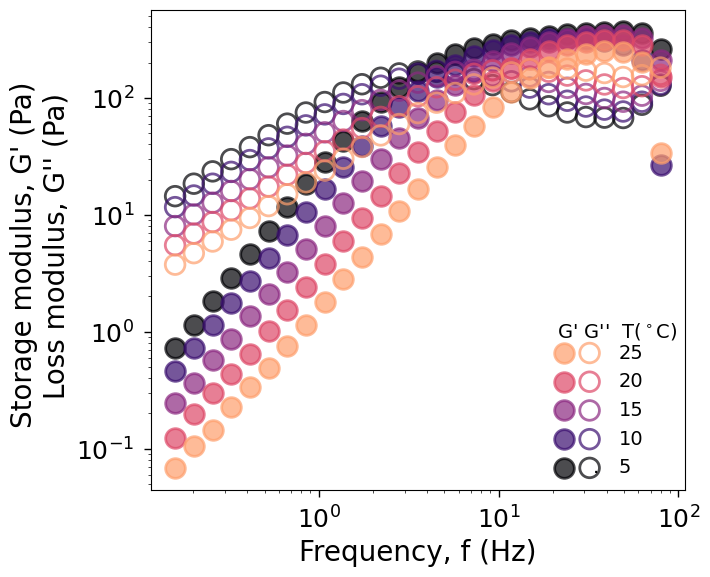

In [91]:
cnf0WLM_ETQ072NaSal015_f_fre = [cnf0WLM_ETQ072NaSal015_f_5_fre, cnf0WLM_ETQ072NaSal015_f_10_fre, cnf0WLM_ETQ072NaSal015_f_15_fre,
                               cnf0WLM_ETQ072NaSal015_f_20_fre, cnf0WLM_ETQ072NaSal015_f_25_fre]
cnf0WLM_ETQ072NaSal015_f_g1 = [cnf0WLM_ETQ072NaSal015_f_5_g1, cnf0WLM_ETQ072NaSal015_f_10_g1, cnf0WLM_ETQ072NaSal015_f_15_g1,
                              cnf0WLM_ETQ072NaSal015_f_20_g1, cnf0WLM_ETQ072NaSal015_f_25_g1]
cnf0WLM_ETQ072NaSal015_f_g2 = [cnf0WLM_ETQ072NaSal015_f_5_g2, cnf0WLM_ETQ072NaSal015_f_10_g2, cnf0WLM_ETQ072NaSal015_f_15_g2,
                              cnf0WLM_ETQ072NaSal015_f_20_g2, cnf0WLM_ETQ072NaSal015_f_25_g2]

cnf001WLM_ETQ036NaSal015_f_fre = [cnf001WLM_ETQ036NaSal015_f_5_fre, cnf001WLM_ETQ036NaSal015_f_10_fre, cnf001WLM_ETQ036NaSal015_f_15_fre,
                                 cnf001WLM_ETQ036NaSal015_f_20_fre, cnf001WLM_ETQ036NaSal015_f_25_fre]
cnf001WLM_ETQ036NaSal015_f_g1 = [cnf001WLM_ETQ036NaSal015_f_5_g1, cnf001WLM_ETQ036NaSal015_f_10_g1, cnf001WLM_ETQ036NaSal015_f_15_g1,
                                cnf001WLM_ETQ036NaSal015_f_20_g1, cnf001WLM_ETQ036NaSal015_f_25_g1]
cnf001WLM_ETQ036NaSal015_f_g2 = [cnf001WLM_ETQ036NaSal015_f_5_g2, cnf001WLM_ETQ036NaSal015_f_10_g2, cnf001WLM_ETQ036NaSal015_f_15_g2,
                                cnf001WLM_ETQ036NaSal015_f_20_g2, cnf001WLM_ETQ036NaSal015_f_25_g2]

WLM_f_T_label_g1 = ['.', '.', '.','.','.']
WLM_f_T_label_g2 = ['5', '10', '15', '20', '25']

cmap = plt.get_cmap('magma')

# Plot the data
fig, ax = plt.subplots(figsize=(6, 6))

for idx, (x, y1, y2, label1, label2) in enumerate(zip(cnf0WLM_ETQ072NaSal015_f_fre, cnf0WLM_ETQ072NaSal015_f_g1, cnf0WLM_ETQ072NaSal015_f_g2, WLM_f_T_label_g1, WLM_f_T_label_g2)):
    c = cmap(float(idx) / len(cnf0WLM_ETQ072NaSal015_f_fre))
    scatter1 = plt.scatter(x, y1, c=np.atleast_2d(c), s =200, alpha = 0.7,
                marker='o', facecolors=c, edgecolors=c, linewidths=2, label=label1)
    scatter2 = plt.scatter(x, y2, c=np.atleast_2d(c), s =200, alpha = 0.7,
                marker='o', edgecolors=c, linewidths=2, label=label2)
    scatter2.set_facecolor('none') 
    

plt.style.use('seaborn-notebook')
#plt.rcParams['font.family'] = 'Arial'
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Frequency, f (Hz)', fontsize=20)
plt.ylabel("Storage modulus, G' (Pa) \n Loss modulus, G'' (Pa)", fontsize=20)

legend_handles = [(scatter1, scatter2) for scatter1, scatter2 in zip(scatter1.get_paths(), scatter2.get_paths())]
legend_labels = WLM_r2_label_g2 

handler_map = {}
for handle, label in zip(legend_handles, legend_labels):
    handler_map[handle] = HandlerTuple(ndivide=None, pad=0.3)

handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[1::2] + handles[::2]  # Combine G1 and G2 handles
labels =  labels[1::2] + labels[::2]   # Combine G1 and G2 labels

label_colors = ['white' if i < 4 else 'black' for i in range(len(labels))]
legend = plt.legend(handles[::-1], labels[::-1], frameon=False, fontsize=14, 
           handler_map=handler_map, labelcolor=label_colors, ncol =2,
          handlelength=-5, handletextpad=4, loc = (0.85, 0.01))

plt.subplots_adjust(left=0.01, right=0.9, top=0.9, bottom=0.1)  # Adjust the values as needed
 
plt.text(21, 0.9, "G' G''  T($^\circ$C)", fontsize=14, color='black')

plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.xlim(0.001, 10)
#plt.ylim(0.05, 2)
plt.savefig("Frequency Sweeps of  WLM(0.72ETQ0.15NaSal) at all T in Hz.png", dpi=1500, bbox_inches='tight')
#plt.savefig("Amplitude Sweeps of CNF Suspensions with Ion Specificity (50mM).png", dpi=1500, bbox_inches='tight')
plt.show()

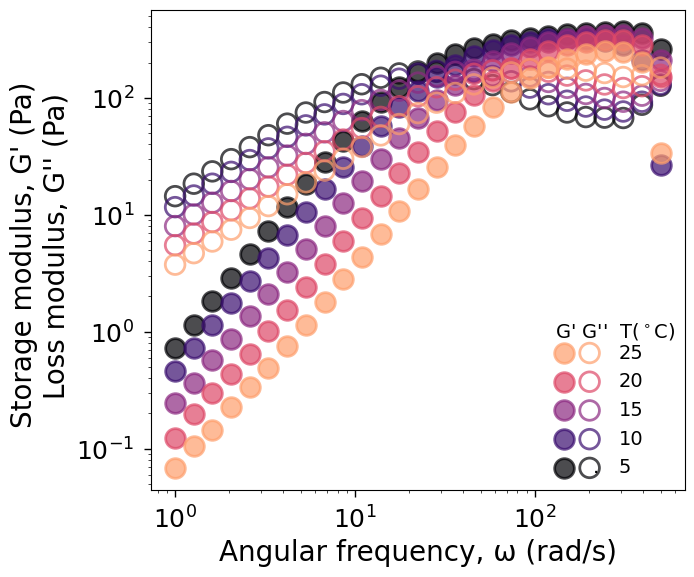

In [78]:
cnf0WLM_ETQ072NaSal015_f_fre_rads = [cnf0WLM_ETQ072NaSal015_f_5_fre_rads, cnf0WLM_ETQ072NaSal015_f_10_fre_rads, cnf0WLM_ETQ072NaSal015_f_15_fre_rads,
                               cnf0WLM_ETQ072NaSal015_f_20_fre_rads, cnf0WLM_ETQ072NaSal015_f_25_fre_rads]
cnf0WLM_ETQ072NaSal015_f_g1 = [cnf0WLM_ETQ072NaSal015_f_5_g1, cnf0WLM_ETQ072NaSal015_f_10_g1, cnf0WLM_ETQ072NaSal015_f_15_g1,
                              cnf0WLM_ETQ072NaSal015_f_20_g1, cnf0WLM_ETQ072NaSal015_f_25_g1]
cnf0WLM_ETQ072NaSal015_f_g2 = [cnf0WLM_ETQ072NaSal015_f_5_g2, cnf0WLM_ETQ072NaSal015_f_10_g2, cnf0WLM_ETQ072NaSal015_f_15_g2,
                              cnf0WLM_ETQ072NaSal015_f_20_g2, cnf0WLM_ETQ072NaSal015_f_25_g2]

cnf001WLM_ETQ036NaSal015_f_fre_rads = [cnf001WLM_ETQ036NaSal015_f_5_fre_rads, cnf001WLM_ETQ036NaSal015_f_10_fre_rads, cnf001WLM_ETQ036NaSal015_f_15_fre_rads,
                                 cnf001WLM_ETQ036NaSal015_f_20_fre_rads, cnf001WLM_ETQ036NaSal015_f_25_fre_rads]
cnf001WLM_ETQ036NaSal015_f_g1 = [cnf001WLM_ETQ036NaSal015_f_5_g1, cnf001WLM_ETQ036NaSal015_f_10_g1, cnf001WLM_ETQ036NaSal015_f_15_g1,
                                cnf001WLM_ETQ036NaSal015_f_20_g1, cnf001WLM_ETQ036NaSal015_f_25_g1]
cnf001WLM_ETQ036NaSal015_f_g2 = [cnf001WLM_ETQ036NaSal015_f_5_g2, cnf001WLM_ETQ036NaSal015_f_10_g2, cnf001WLM_ETQ036NaSal015_f_15_g2,
                                cnf001WLM_ETQ036NaSal015_f_20_g2, cnf001WLM_ETQ036NaSal015_f_25_g2]

WLM_f_T_label_g1 = ['.', '.', '.','.','.']
WLM_f_T_label_g2 = ['5', '10', '15', '20', '25']

cmap = plt.get_cmap('magma')

# Plot the data
fig, ax = plt.subplots(figsize=(6, 6))

for idx, (x, y1, y2, label1, label2) in enumerate(zip(cnf0WLM_ETQ072NaSal015_f_fre_rads, cnf0WLM_ETQ072NaSal015_f_g1, cnf0WLM_ETQ072NaSal015_f_g2, WLM_f_T_label_g1, WLM_f_T_label_g2)):
    c = cmap(float(idx) / len(cnf0WLM_ETQ072NaSal015_f_fre))
    scatter1 = plt.scatter(x, y1, c=np.atleast_2d(c), s =200, alpha = 0.7,
                marker='o', facecolors=c, edgecolors=c, linewidths=2, label=label1)
    scatter2 = plt.scatter(x, y2, c=np.atleast_2d(c), s =200, alpha = 0.7,
                marker='o', edgecolors=c, linewidths=2, label=label2)
    scatter2.set_facecolor('none') 
    

plt.style.use('seaborn-notebook')
#plt.rcParams['font.family'] = 'Arial'
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Angular frequency, \u03C9 (rad/s)', fontsize=20)
plt.ylabel("Storage modulus, G' (Pa) \n Loss modulus, G'' (Pa)", fontsize=20)

legend_handles = [(scatter1, scatter2) for scatter1, scatter2 in zip(scatter1.get_paths(), scatter2.get_paths())]
legend_labels = WLM_r2_label_g2 

handler_map = {}
for handle, label in zip(legend_handles, legend_labels):
    handler_map[handle] = HandlerTuple(ndivide=None, pad=0.3)

handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[1::2] + handles[::2]  # Combine G1 and G2 handles
labels =  labels[1::2] + labels[::2]   # Combine G1 and G2 labels

label_colors = ['white' if i < 4 else 'black' for i in range(len(labels))]
legend = plt.legend(handles[::-1], labels[::-1], frameon=False, fontsize=14, 
           handler_map=handler_map, labelcolor=label_colors, ncol =2,
          handlelength=-5, handletextpad=4, loc = (0.85, 0.01))

plt.subplots_adjust(left=0.01, right=0.9, top=0.9, bottom=0.1)  # Adjust the values as needed
 
plt.text(130, 0.9, "G' G''  T($^\circ$C)", fontsize=14, color='black')

plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.xlim(0.001, 10)
#plt.ylim(0.05, 2)
plt.savefig("Frequency Sweeps of  WLM(0.72ETQ0.15NaSal) at all T.png", dpi=1500, bbox_inches='tight')
plt.show()

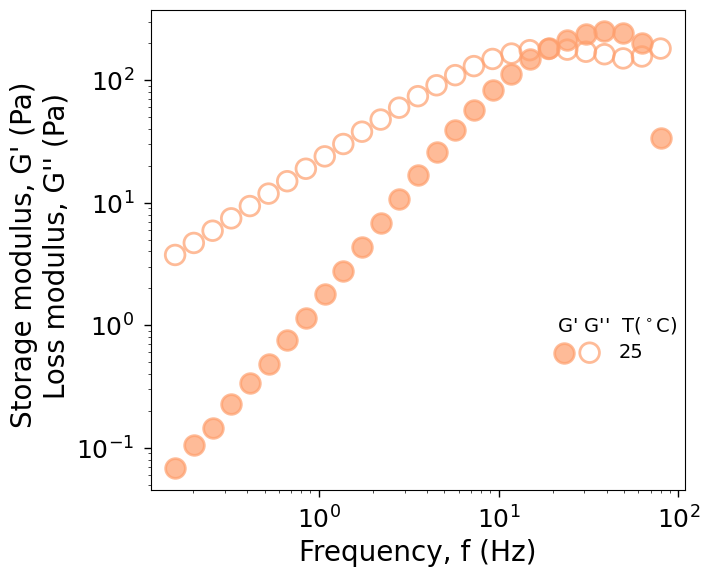

In [79]:
cmap = plt.get_cmap('magma')

# Plot the data
fig, ax = plt.subplots(figsize=(6, 6))

for idx, (x, y1, y2, label1, label2) in enumerate(zip(cnf0WLM_ETQ072NaSal015_f_fre, cnf0WLM_ETQ072NaSal015_f_g1, cnf0WLM_ETQ072NaSal015_f_g2, WLM_f_T_label_g1, WLM_f_T_label_g2)):
    if idx > 3:
        c = cmap(float(idx) / len(cnf0WLM_ETQ072NaSal015_f_fre))
        scatter1 = plt.scatter(x, y1, c=np.atleast_2d(c), s =200, alpha = 0.7,
                    marker='o', facecolors=c, edgecolors=c, linewidths=2, label=label1)
        scatter2 = plt.scatter(x, y2, c=np.atleast_2d(c), s =200, alpha = 0.7,
                    marker='o', edgecolors=c, linewidths=2, label=label2)
        scatter2.set_facecolor('none') 
    

plt.style.use('seaborn-notebook')
#plt.rcParams['font.family'] = 'Arial'
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Frequency, f (Hz)', fontsize=20)
#plt.xlabel('Angular frequency, \u03C9 (rad/s)', fontsize=20)
plt.ylabel("Storage modulus, G' (Pa) \n Loss modulus, G'' (Pa)", fontsize=20)

legend_handles = [(scatter1, scatter2) for scatter1, scatter2 in zip(scatter1.get_paths(), scatter2.get_paths())]
legend_labels = WLM_r2_label_g2 

handler_map = {}
for handle, label in zip(legend_handles, legend_labels):
    handler_map[handle] = HandlerTuple(ndivide=None, pad=0.3)

handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[1::2] + handles[::2]  # Combine G1 and G2 handles
labels =  labels[1::2] + labels[::2]   # Combine G1 and G2 labels

label_colors = ['white' if i < 1 else 'black' for i in range(len(labels))]
legend = plt.legend(handles[::-1], labels[::-1], frameon=False, fontsize=14, 
           handler_map=handler_map, labelcolor=label_colors, ncol =2,
          handlelength=-5, handletextpad=4, loc = (0.85, 0.25))

plt.subplots_adjust(left=0.01, right=0.9, top=0.9, bottom=0.1)  # Adjust the values as needed
 
plt.text(21, 0.9, "G' G''  T($^\circ$C)", fontsize=14, color='black')

plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.xlim(0.001, 10)
#plt.ylim(0.05, 2)
plt.savefig("Frequency Sweep WLM(0.72ETQ0.15NaSal) at 25C.png", dpi=1500, bbox_inches='tight')
plt.show()

   Data Set CNF      G'     λ_1     G''     λ_2
0         5  25  206.78  0.1018  405.73  0.0431


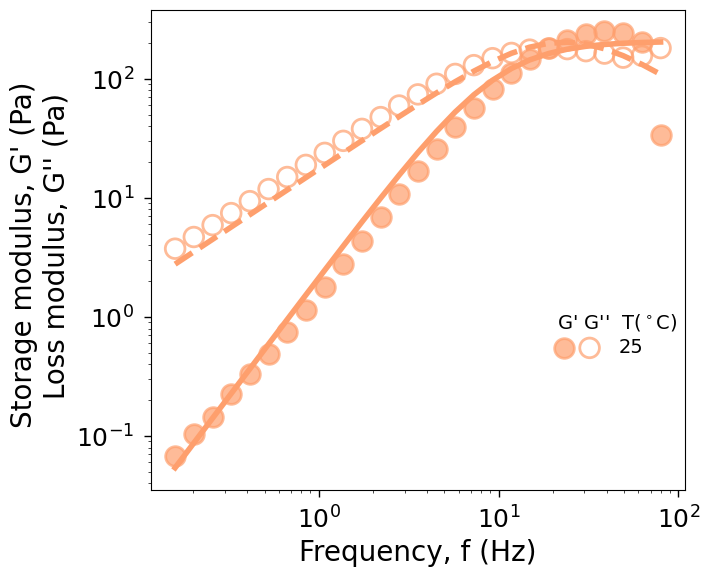

In [80]:
def model1(ω, G0, λ_i):
    return G0 * (ω**2 * λ_i**2) / (1 + ω**2 * λ_i**2)

def model2(ω, G0, λ_i):
    return G0 * (ω * λ_i) / (1 + ω**2 * λ_i**2)

fitting_results_CNFWLM = []

cmap = plt.get_cmap('magma')

# Plot the data
fig, ax = plt.subplots(figsize=(6, 6))

for idx, (x, y1, y2, label1, label2) in enumerate(zip(cnf0WLM_ETQ072NaSal015_f_fre, cnf0WLM_ETQ072NaSal015_f_g1, cnf0WLM_ETQ072NaSal015_f_g2, WLM_f_T_label_g1, WLM_f_T_label_g2)):
    if idx > 3:
        c = cmap(float(idx) / len(cnf0WLM_ETQ072NaSal015_f_fre))
        scatter1 = plt.scatter(x, y1, c=np.atleast_2d(c), s =200, alpha = 0.7,
                    marker='o', facecolors=c, edgecolors=c, linewidths=2, label=label1)
        scatter2 = plt.scatter(x, y2, c=np.atleast_2d(c), s =200, alpha = 0.7,
                    marker='o', edgecolors=c, linewidths=2, label=label2)
        scatter2.set_facecolor('none') 
    
        x_flat_CNFWLM = np.ravel(x)
        y1_flat_CNFWLM = np.ravel(y1)
        y2_flat_CNFWLM = np.ravel(y2)
    
        G0_guess_1 = np.max(y1_flat_CNFWLM)
        lambda_guess_1 = 0.01
        G0_guess_2 = np.max(y2_flat_CNFWLM)
        lambda_guess_2 = 0.01
        
        popt1_CNFWLM, _ = curve_fit(model1, x_flat_CNFWLM, y1_flat_CNFWLM, p0=[G0_guess_1, lambda_guess_1])
        popt2_CNFWLM, _ = curve_fit(model2, x_flat_CNFWLM, y2_flat_CNFWLM, p0=[G0_guess_2, lambda_guess_2])
        
        G0_1_CNFWLM, lambda_1_CNFWLM = popt1_CNFWLM[0], popt1_CNFWLM[1]
        G0_2_CNFWLM, lambda_2_CNFWLM = popt2_CNFWLM[0], popt2_CNFWLM[1]

        #print(f"Fitting results for Data Set {idx+1}:")
        #print("Fitting results for G':")
            #print(f"G0_1: {G0_1:.2f}")
            #print(f"λ_1: {lambda_1:.4f}")
        
            #print("Fitting results for G'':")
            #print(f"G0_2: {G0_2:.2f}")
            #print(f"λ_2: {lambda_2:.4f}")
        #print("-------------------------------")
        
        plt.plot(x, model1(x, *popt1_CNFWLM), '-', c=c, linewidth=4)
        plt.plot(x, model2(x, *popt2_CNFWLM), '--', c=c, linewidth=4)
        fitting_results_CNFWLM.append({
            'Data Set': idx+1,
            'CNF': label2,
            "G'": f"{G0_1_CNFWLM:.2f}",
            "λ_1": f"{lambda_1_CNFWLM:.4f}",
            "G''": f"{G0_2_CNFWLM:.2f}",
            "λ_2": f"{lambda_2_CNFWLM:.4f}"
            })
fitting_df_CNFWLM = pd.DataFrame(fitting_results_CNFWLM)
print(fitting_df_CNFWLM)

plt.style.use('seaborn-notebook')
#plt.rcParams['font.family'] = 'Arial'
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Frequency, f (Hz)', fontsize=20)
#plt.xlabel('Angular frequency, \u03C9 (rad/s)', fontsize=20)
plt.ylabel("Storage modulus, G' (Pa) \n Loss modulus, G'' (Pa)", fontsize=20)

legend_handles = [(scatter1, scatter2) for scatter1, scatter2 in zip(scatter1.get_paths(), scatter2.get_paths())]
legend_labels = WLM_r2_label_g2 

handler_map = {}
for handle, label in zip(legend_handles, legend_labels):
    handler_map[handle] = HandlerTuple(ndivide=None, pad=0.3)

handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[1::2] + handles[::2]  # Combine G1 and G2 handles
labels =  labels[1::2] + labels[::2]   # Combine G1 and G2 labels

label_colors = ['white' if i < 1 else 'black' for i in range(len(labels))]
legend = plt.legend(handles[::-1], labels[::-1], frameon=False, fontsize=14, 
           handler_map=handler_map, labelcolor=label_colors, ncol =2,
          handlelength=-5, handletextpad=4, loc = (0.85, 0.26))

plt.subplots_adjust(left=0.01, right=0.9, top=0.9, bottom=0.1)  # Adjust the values as needed
 
plt.text(21, 0.8, "G' G''  T($^\circ$C)", fontsize=14, color='black')

plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.xlim(0.001, 10)
#plt.ylim(0.05, 2)
plt.savefig("Frequency Sweep WLM(0.72ETQ0.15NaSal) at 25C fitted.png", dpi=1500, bbox_inches='tight')
plt.show()

   Data Set CNF      G'     λ_1     G''     λ_2
0         2  10  269.64  0.2698  372.21  0.1605
1         3  15  324.55  0.1462  380.08  0.1055
2         4  20  286.00  0.1132  393.58  0.0672
3         5  25  206.78  0.1018  405.73  0.0431


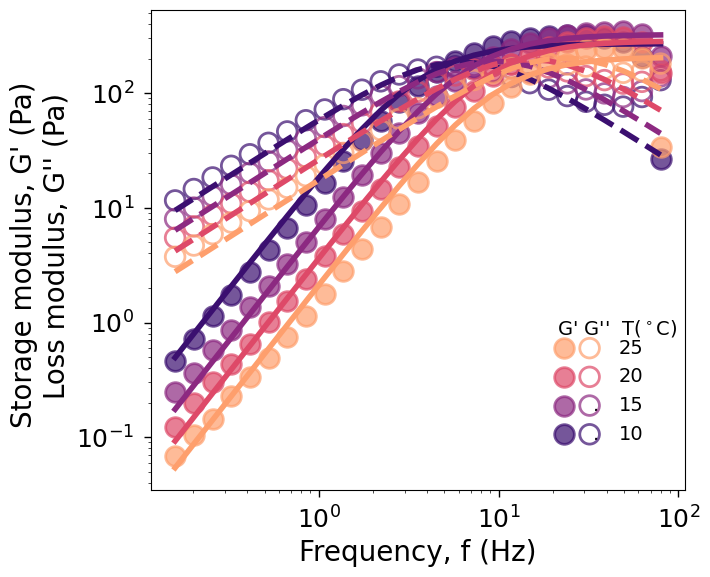

In [418]:
def model1(ω, G0, λ_i):
    return G0 * (ω**2 * λ_i**2) / (1 + ω**2 * λ_i**2)

def model2(ω, G0, λ_i):
    return G0 * (ω * λ_i) / (1 + ω**2 * λ_i**2)

fitting_results_CNFWLM = []

cmap = plt.get_cmap('magma')

# Plot the data
fig, ax = plt.subplots(figsize=(6, 6))

for idx, (x, y1, y2, label1, label2) in enumerate(zip(cnf0WLM_ETQ072NaSal015_f_fre, cnf0WLM_ETQ072NaSal015_f_g1, cnf0WLM_ETQ072NaSal015_f_g2, WLM_f_T_label_g1, WLM_f_T_label_g2)):
    if idx > 0 :
        c = cmap(float(idx) / len(cnf0WLM_ETQ072NaSal015_f_fre))
        scatter1 = plt.scatter(x, y1, c=np.atleast_2d(c), s =200, alpha = 0.7,
                    marker='o', facecolors=c, edgecolors=c, linewidths=2, label=label1)
        scatter2 = plt.scatter(x, y2, c=np.atleast_2d(c), s =200, alpha = 0.7,
                    marker='o', edgecolors=c, linewidths=2, label=label2)
        scatter2.set_facecolor('none') 
    
        x_flat_CNFWLM = np.ravel(x)
        y1_flat_CNFWLM = np.ravel(y1)
        y2_flat_CNFWLM = np.ravel(y2)
    
        G0_guess_1 = np.max(y1_flat_CNFWLM)
        lambda_guess_1 = 0.01
        G0_guess_2 = np.max(y2_flat_CNFWLM)
        lambda_guess_2 = 0.01
        
        popt1_CNFWLM, _ = curve_fit(model1, x_flat_CNFWLM, y1_flat_CNFWLM, p0=[G0_guess_1, lambda_guess_1])
        popt2_CNFWLM, _ = curve_fit(model2, x_flat_CNFWLM, y2_flat_CNFWLM, p0=[G0_guess_2, lambda_guess_2])
        
        G0_1_CNFWLM, lambda_1_CNFWLM = popt1_CNFWLM[0], popt1_CNFWLM[1]
        G0_2_CNFWLM, lambda_2_CNFWLM = popt2_CNFWLM[0], popt2_CNFWLM[1]

        #print(f"Fitting results for Data Set {idx+1}:")
        #print("Fitting results for G':")
            #print(f"G0_1: {G0_1:.2f}")
            #print(f"λ_1: {lambda_1:.4f}")
        
            #print("Fitting results for G'':")
            #print(f"G0_2: {G0_2:.2f}")
            #print(f"λ_2: {lambda_2:.4f}")
        #print("-------------------------------")
        
        plt.plot(x, model1(x, *popt1_CNFWLM), '-', c=c, linewidth=4)
        plt.plot(x, model2(x, *popt2_CNFWLM), '--', c=c, linewidth=4)
        fitting_results_CNFWLM.append({
            'Data Set': idx+1,
            'CNF': label2,
            "G'": f"{G0_1_CNFWLM:.2f}",
            "λ_1": f"{lambda_1_CNFWLM:.4f}",
            "G''": f"{G0_2_CNFWLM:.2f}",
            "λ_2": f"{lambda_2_CNFWLM:.4f}"
            })
fitting_df_CNFWLM = pd.DataFrame(fitting_results_CNFWLM)
print(fitting_df_CNFWLM)

plt.style.use('seaborn-notebook')
#plt.rcParams['font.family'] = 'Arial'
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Frequency, f (Hz)', fontsize=20)
#plt.xlabel('Angular frequency, \u03C9 (rad/s)', fontsize=20)
plt.ylabel("Storage modulus, G' (Pa) \n Loss modulus, G'' (Pa)", fontsize=20)

legend_handles = [(scatter1, scatter2) for scatter1, scatter2 in zip(scatter1.get_paths(), scatter2.get_paths())]
legend_labels = WLM_r2_label_g2 

handler_map = {}
for handle, label in zip(legend_handles, legend_labels):
    handler_map[handle] = HandlerTuple(ndivide=None, pad=0.3)

handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[1::2] + handles[::2]  # Combine G1 and G2 handles
labels =  labels[1::2] + labels[::2]   # Combine G1 and G2 labels

label_colors = ['white' if i < 2 else 'black' for i in range(len(labels))]
legend = plt.legend(handles[::-1], labels[::-1], frameon=False, fontsize=14, 
           handler_map=handler_map, labelcolor=label_colors, ncol =2,
          handlelength=-5, handletextpad=4, loc = (0.85, 0.08))

plt.subplots_adjust(left=0.01, right=0.9, top=0.9, bottom=0.1)  # Adjust the values as needed
 
plt.text(21, 0.8, "G' G''  T($^\circ$C)", fontsize=14, color='black')

plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.xlim(0.001, 10)
#plt.ylim(0.05, 2)
#plt.savefig("Frequency Sweep WLM(0.72ETQ0.15NaSal) 10C to 25C fitted.png", dpi=1500, bbox_inches='tight')
plt.show()

   Data Set CNF      G'     λ_1     G''     λ_2
0         1   5  345.08  0.2646  361.46  0.2244
1         2  10  269.64  0.2698  372.21  0.1605
2         3  15  324.55  0.1462  380.08  0.1055
3         4  20  286.00  0.1132  393.58  0.0672
4         5  25  206.78  0.1018  405.73  0.0431


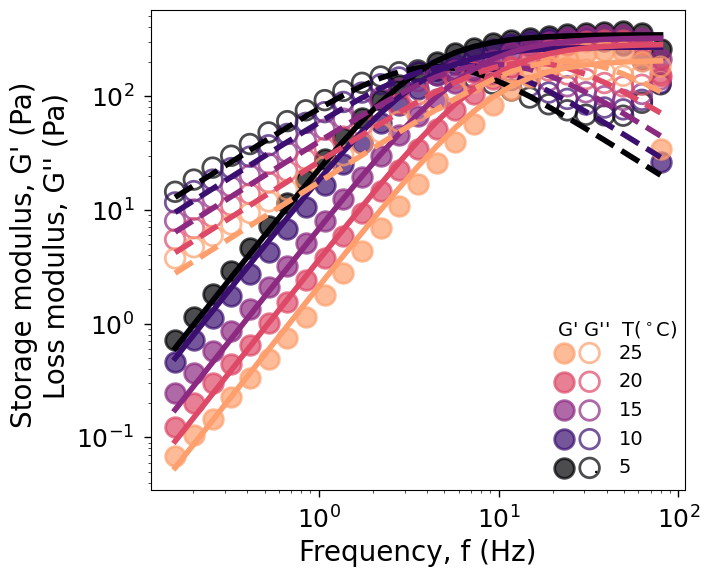

In [81]:
def model1(ω, G0, λ_i):
    return G0 * (ω**2 * λ_i**2) / (1 + ω**2 * λ_i**2)

def model2(ω, G0, λ_i):
    return G0 * (ω * λ_i) / (1 + ω**2 * λ_i**2)

fitting_results_CNFWLM = []

cmap = plt.get_cmap('magma')

# Plot the data
fig, ax = plt.subplots(figsize=(6, 6))

for idx, (x, y1, y2, label1, label2) in enumerate(zip(cnf0WLM_ETQ072NaSal015_f_fre, cnf0WLM_ETQ072NaSal015_f_g1, cnf0WLM_ETQ072NaSal015_f_g2, WLM_f_T_label_g1, WLM_f_T_label_g2)):
    if idx <5:
        c = cmap(float(idx) / len(cnf0WLM_ETQ072NaSal015_f_fre))
        scatter1 = plt.scatter(x, y1, c=np.atleast_2d(c), s =200, alpha = 0.7,
                    marker='o', facecolors=c, edgecolors=c, linewidths=2, label=label1)
        scatter2 = plt.scatter(x, y2, c=np.atleast_2d(c), s =200, alpha = 0.7,
                    marker='o', edgecolors=c, linewidths=2, label=label2)
        scatter2.set_facecolor('none') 
    
        x_flat_CNFWLM = np.ravel(x)
        y1_flat_CNFWLM = np.ravel(y1)
        y2_flat_CNFWLM = np.ravel(y2)
    
        G0_guess_1 = np.max(y1_flat_CNFWLM)
        lambda_guess_1 = 0.01
        G0_guess_2 = np.max(y2_flat_CNFWLM)
        lambda_guess_2 = 0.01
        
        popt1_CNFWLM, _ = curve_fit(model1, x_flat_CNFWLM, y1_flat_CNFWLM, p0=[G0_guess_1, lambda_guess_1])
        popt2_CNFWLM, _ = curve_fit(model2, x_flat_CNFWLM, y2_flat_CNFWLM, p0=[G0_guess_2, lambda_guess_2])
        
        G0_1_CNFWLM, lambda_1_CNFWLM = popt1_CNFWLM[0], popt1_CNFWLM[1]
        G0_2_CNFWLM, lambda_2_CNFWLM = popt2_CNFWLM[0], popt2_CNFWLM[1]

        #print(f"Fitting results for Data Set {idx+1}:")
        #print("Fitting results for G':")
            #print(f"G0_1: {G0_1:.2f}")
            #print(f"λ_1: {lambda_1:.4f}")
        
            #print("Fitting results for G'':")
            #print(f"G0_2: {G0_2:.2f}")
            #print(f"λ_2: {lambda_2:.4f}")
            #print("-------------------------------")
        
        plt.plot(x, model1(x, *popt1_CNFWLM), '-', c=c, linewidth=4)
        plt.plot(x, model2(x, *popt2_CNFWLM), '--', c=c, linewidth=4)
        fitting_results_CNFWLM.append({
            'Data Set': idx+1,
            'CNF': label2,
            "G'": f"{G0_1_CNFWLM:.2f}",
            "λ_1": f"{lambda_1_CNFWLM:.4f}",
            "G''": f"{G0_2_CNFWLM:.2f}",
            "λ_2": f"{lambda_2_CNFWLM:.4f}"
            })
fitting_df_CNFWLM = pd.DataFrame(fitting_results_CNFWLM)
print(fitting_df_CNFWLM)

plt.style.use('seaborn-notebook')
#plt.rcParams['font.family'] = 'Arial'
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Frequency, f (Hz)', fontsize=20)
plt.ylabel("Storage modulus, G' (Pa) \n Loss modulus, G'' (Pa)", fontsize=20)

legend_handles = [(scatter1, scatter2) for scatter1, scatter2 in zip(scatter1.get_paths(), scatter2.get_paths())]
legend_labels = WLM_r2_label_g2 

handler_map = {}
for handle, label in zip(legend_handles, legend_labels):
    handler_map[handle] = HandlerTuple(ndivide=None, pad=0.3)

handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[1::2] + handles[::2]  # Combine G1 and G2 handles
labels =  labels[1::2] + labels[::2]   # Combine G1 and G2 labels

label_colors = ['white' if i < 4 else 'black' for i in range(len(labels))]
legend = plt.legend(handles[::-1], labels[::-1], frameon=False, fontsize=14, 
           handler_map=handler_map, labelcolor=label_colors, ncol =2,
          handlelength=-5, handletextpad=4, loc = (0.85, 0.01))

plt.subplots_adjust(left=0.01, right=0.9, top=0.9, bottom=0.1)  # Adjust the values as needed
 
plt.text(21, 0.8, "G' G''  T($^\circ$C)", fontsize=14, color='black')

plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xticks(fontsize=18)  
plt.yticks(fontsize=18)
#plt.xlim(0.001, 10)
#plt.ylim(0.05, 2)
plt.savefig("Frequency Sweep WLM(0.72ETQ0.15NaSal) 5C to 25C fitted.png", dpi=1500, bbox_inches='tight')
plt.show()

   Data Set CNF      G'     λ_1     G''     λ_2
0         1   5  345.08  0.2646  361.46  0.2244
1         2  10  269.64  0.2698  372.21  0.1605
2         3  15  324.55  0.1462  380.08  0.1055
3         4  20  286.00  0.1132  393.58  0.0672
4         5  25  206.78  0.1018  405.73  0.0431


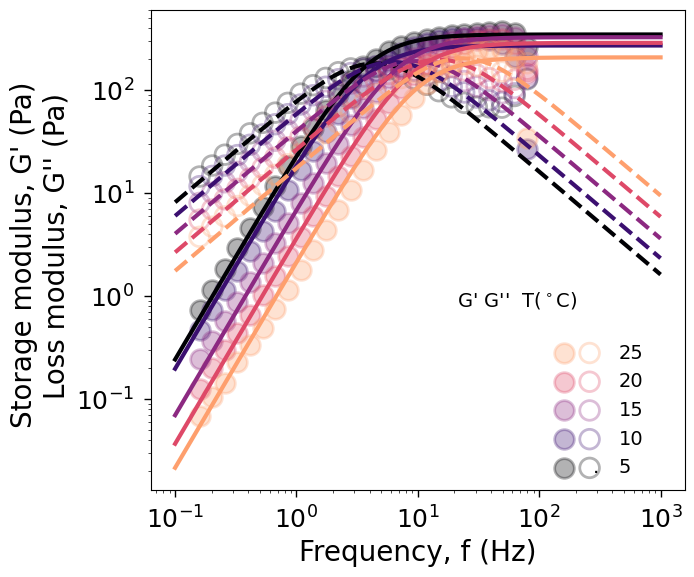

In [116]:
def model1(ω, G0, λ_i):
    return G0 * (ω**2 * λ_i**2) / (1 + ω**2 * λ_i**2)

def model2(ω, G0, λ_i):
    return G0 * (ω * λ_i) / (1 + ω**2 * λ_i**2)

fitting_results_CNFWLM = []

cmap = plt.get_cmap('magma')

# Plot the data
fig, ax = plt.subplots(figsize=(6, 6))

for idx, (x, y1, y2, label1, label2) in enumerate(zip(cnf0WLM_ETQ072NaSal015_f_fre, cnf0WLM_ETQ072NaSal015_f_g1, cnf0WLM_ETQ072NaSal015_f_g2, WLM_f_T_label_g1, WLM_f_T_label_g2)):
    if idx < 5:
        c = cmap(float(idx) / len(cnf0WLM_ETQ072NaSal015_f_fre))
        scatter1 = plt.scatter(x, y1, c=np.atleast_2d(c), s=200, alpha=0.3,
                               marker='o', facecolors=c, edgecolors=c, linewidths=2, label=label1)
        scatter2 = plt.scatter(x, y2, c=np.atleast_2d(c), s=200, alpha=0.3,
                               marker='o', edgecolors=c, linewidths=2, label=label2)
        scatter2.set_facecolor('none')

        x_flat_CNFWLM = np.ravel(x)
        y1_flat_CNFWLM = np.ravel(y1)
        y2_flat_CNFWLM = np.ravel(y2)

        G0_guess_1 = np.max(y1_flat_CNFWLM)
        lambda_guess_1 = 0.01
        G0_guess_2 = np.max(y2_flat_CNFWLM)
        lambda_guess_2 = 0.01

        popt1_CNFWLM, _ = curve_fit(model1, x_flat_CNFWLM, y1_flat_CNFWLM, p0=[G0_guess_1, lambda_guess_1])
        popt2_CNFWLM, _ = curve_fit(model2, x_flat_CNFWLM, y2_flat_CNFWLM, p0=[G0_guess_2, lambda_guess_2])

        G0_1_CNFWLM, lambda_1_CNFWLM = popt1_CNFWLM[0], popt1_CNFWLM[1]
        G0_2_CNFWLM, lambda_2_CNFWLM = popt2_CNFWLM[0], popt2_CNFWLM[1]

        # Extend the range of x values for plotting the fitted curves
        extended_x_range = np.logspace(-1, 3, 1000)
        extended_y1 = model1(extended_x_range, *popt1_CNFWLM)
        extended_y2 = model2(extended_x_range, *popt2_CNFWLM)

        plt.plot(extended_x_range, extended_y1, '-', c=c, linewidth=3)#, label=f'{label1} (Fitted)')
        plt.plot(extended_x_range, extended_y2, '--', c=c, linewidth=3)#, label=f'{label2} (Fitted)')

        fitting_results_CNFWLM.append({
            'Data Set': idx + 1,
            'CNF': label2,
            "G'": f"{G0_1_CNFWLM:.2f}",
            "λ_1": f"{lambda_1_CNFWLM:.4f}",
            "G''": f"{G0_2_CNFWLM:.2f}",
            "λ_2": f"{lambda_2_CNFWLM:.4f}"
        })

fitting_df_CNFWLM = pd.DataFrame(fitting_results_CNFWLM)
print(fitting_df_CNFWLM)

plt.style.use('seaborn-notebook')
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Frequency, f (Hz)', fontsize=20)
plt.ylabel("Storage modulus, G' (Pa) \n Loss modulus, G'' (Pa)", fontsize=20)

legend_handles = [(scatter1, scatter2) for scatter1, scatter2 in zip(scatter1.get_paths(), scatter2.get_paths())]
legend_labels = WLM_r2_label_g2

handler_map = {}
for handle, label in zip(legend_handles, legend_labels):
    handler_map[handle] = HandlerTuple(ndivide=None, pad=0.3)

handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[1::2] + handles[::2]  # Combine G1 and G2 handles
labels = labels[1::2] + labels[::2]   # Combine G1 and G2 labels

label_colors = ['white' if i < 4 else 'black' for i in range(len(labels))]
legend = plt.legend(handles[::-1], labels[::-1], frameon=False, fontsize=14,
                    handler_map=handler_map, labelcolor=label_colors, ncol=2,
                    handlelength=-5, handletextpad=4, loc=(0.85, 0.01))

plt.subplots_adjust(left=0.01, right=0.9, top=0.9, bottom=0.1)

plt.text(21, 0.8, "G' G''  T($^\circ$C)", fontsize=14, color='black')

plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Uncomment the following lines if you want to set specific limits for the plot
# plt.xlim(minimum_x_value, maximum_x_value)
# plt.ylim(minimum_y_value, maximum_y_value)

#plt.savefig("Frequency Sweep WLM(0.72ETQ0.15NaSal) 5C to 25C fitted.png", dpi=1500, bbox_inches='tight')
plt.show()

   Data Set CNF      G'       λ     G''
0         1   5  345.08  0.2646  361.46
1         2  10  269.64  0.2698  372.21
2         3  15  324.55  0.1462  380.08
3         4  20  286.00  0.1132  393.58
4         5  25  206.78  0.1018  405.73


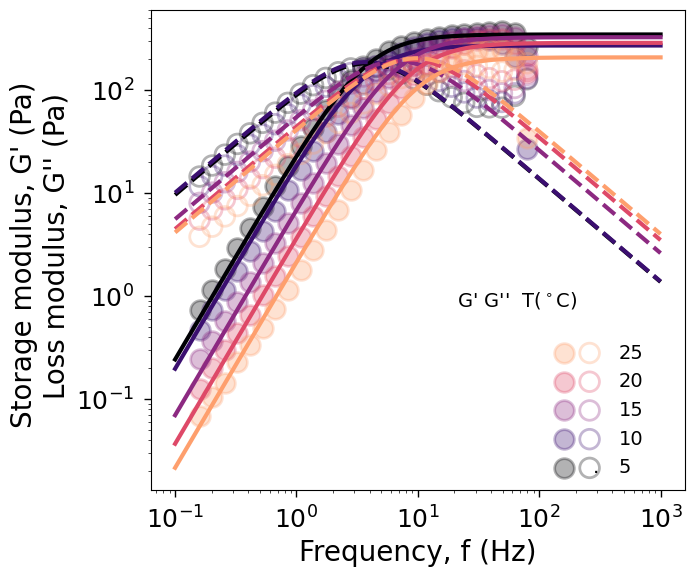

In [120]:
def model1(ω, G0, λ_i):
    return G0 * (ω**2 * λ_i**2) / (1 + ω**2 * λ_i**2)

def model2(ω, G0, λ_i):
    return G0 * (ω * λ_i) / (1 + ω**2 * λ_i**2)

fitting_results_CNFWLM = []

cmap = plt.get_cmap('magma')

fig, ax = plt.subplots(figsize=(6, 6))

for idx, (x, y1, y2, label1, label2) in enumerate(zip(cnf0WLM_ETQ072NaSal015_f_fre, cnf0WLM_ETQ072NaSal015_f_g1, cnf0WLM_ETQ072NaSal015_f_g2, WLM_f_T_label_g1, WLM_f_T_label_g2)):
    if idx < 5:
        c = cmap(float(idx) / len(cnf0WLM_ETQ072NaSal015_f_fre))
        scatter1 = plt.scatter(x, y1, c=np.atleast_2d(c), s=200, alpha=0.3,
                               marker='o', facecolors=c, edgecolors=c, linewidths=2, label=label1)
        scatter2 = plt.scatter(x, y2, c=np.atleast_2d(c), s=200, alpha=0.3,
                               marker='o', edgecolors=c, linewidths=2, label=label2)
        scatter2.set_facecolor('none')

        x_flat_CNFWLM = np.ravel(x)
        y1_flat_CNFWLM = np.ravel(y1)
        y2_flat_CNFWLM = np.ravel(y2)

        G0_guess_1 = np.max(y1_flat_CNFWLM)
        G0_guess_2 = np.max(y2_flat_CNFWLM)
        lambda_guess = 0.01  # Initial guess for lambda (common to both G' and G'' models)

        # Perform curve fitting using the same lambda value for both models
        popt1_CNFWLM, _ = curve_fit(model1, x_flat_CNFWLM, y1_flat_CNFWLM, p0=[G0_guess_1, lambda_guess])
        popt2_CNFWLM, _ = curve_fit(model2, x_flat_CNFWLM, y2_flat_CNFWLM, p0=[G0_guess_2, lambda_guess])

        G0_1_CNFWLM, lambda_CNFWLM = popt1_CNFWLM[0], popt1_CNFWLM[1]
        G0_2_CNFWLM = popt2_CNFWLM[0]

        # Extend the range of x values for plotting the fitted curves
        extended_x_range = np.logspace(-1, 3, 1000)
        extended_y1 = model1(extended_x_range, G0_1_CNFWLM, lambda_CNFWLM)
        extended_y2 = model2(extended_x_range, G0_2_CNFWLM, lambda_CNFWLM)

        plt.plot(extended_x_range, extended_y1, '-', c=c, linewidth=3)#, label=f'{label1} (Fitted)')
        plt.plot(extended_x_range, extended_y2, '--', c=c, linewidth=3)#, label=f'{label2} (Fitted)')

        fitting_results_CNFWLM.append({
            'Data Set': idx + 1,
            'CNF': label2,
            "G'": f"{G0_1_CNFWLM:.2f}",
            "λ": f"{lambda_CNFWLM:.4f}",  # Use a common lambda value for both G' and G''
            "G''": f"{G0_2_CNFWLM:.2f}",
        })

fitting_df_CNFWLM = pd.DataFrame(fitting_results_CNFWLM)
print(fitting_df_CNFWLM)

plt.style.use('seaborn-notebook')
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Frequency, f (Hz)', fontsize=20)
plt.ylabel("Storage modulus, G' (Pa) \n Loss modulus, G'' (Pa)", fontsize=20)

legend_handles = [(scatter1, scatter2) for scatter1, scatter2 in zip(scatter1.get_paths(), scatter2.get_paths())]
legend_labels = WLM_r2_label_g2

handler_map = {}
for handle, label in zip(legend_handles, legend_labels):
    handler_map[handle] = HandlerTuple(ndivide=None, pad=0.3)

handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[1::2] + handles[::2]  # Combine G1 and G2 handles
labels = labels[1::2] + labels[::2]   # Combine G1 and G2 labels

label_colors = ['white' if i < 4 else 'black' for i in range(len(labels))]
legend = plt.legend(handles[::-1], labels[::-1], frameon=False, fontsize=14,
                    handler_map=handler_map, labelcolor=label_colors, ncol=2,
                    handlelength=-5, handletextpad=4, loc=(0.85, 0.01))

plt.subplots_adjust(left=0.01, right=0.9, top=0.9, bottom=0.1)

plt.text(21, 0.8, "G' G''  T($^\circ$C)", fontsize=14, color='black')

plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Uncomment the following lines if you want to set specific limits for the plot
# plt.xlim(minimum_x_value, maximum_x_value)
# plt.ylim(minimum_y_value, maximum_y_value)

#plt.savefig("Frequency Sweep WLM(0.72ETQ0.15NaSal) 5C to 25C fitted.png", dpi=1500, bbox_inches='tight')
plt.show()

   Data Set CNF      G'       λ     G''
0         2  10  269.64  0.2698  372.21
1         3  15  324.55  0.1462  380.08
2         4  20  286.00  0.1132  393.58
3         5  25  206.78  0.1018  405.73


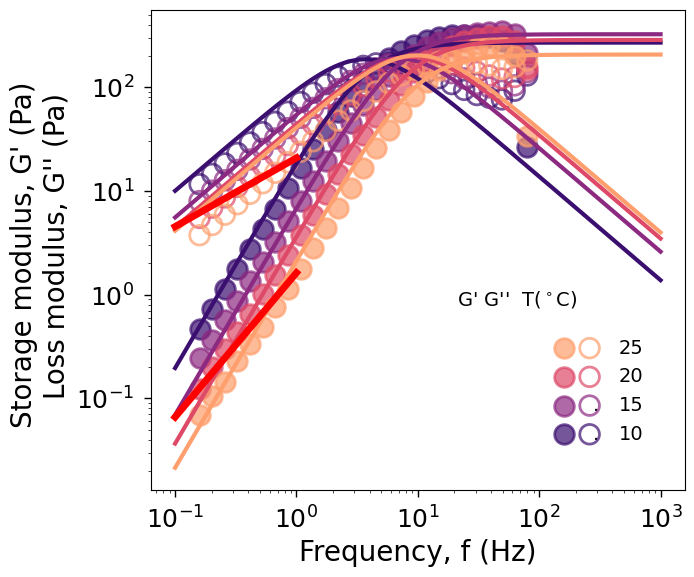

In [134]:
def model1(ω, G0, λ_i):
    return G0 * (ω**2 * λ_i**2) / (1 + ω**2 * λ_i**2)

def model2(ω, G0, λ_i):
    return G0 * (ω * λ_i) / (1 + ω**2 * λ_i**2)

fitting_results_CNFWLM = []

cmap = plt.get_cmap('magma')

# Plot the data
fig, ax = plt.subplots(figsize=(6, 6))

for idx, (x, y1, y2, label1, label2) in enumerate(zip(cnf0WLM_ETQ072NaSal015_f_fre, cnf0WLM_ETQ072NaSal015_f_g1, cnf0WLM_ETQ072NaSal015_f_g2, WLM_f_T_label_g1, WLM_f_T_label_g2)):
    if idx > 0 :
        c = cmap(float(idx) / len(cnf0WLM_ETQ072NaSal015_f_fre))
        scatter1 = plt.scatter(x, y1, c=np.atleast_2d(c), s =200, alpha = 0.7,
                    marker='o', facecolors=c, edgecolors=c, linewidths=2, label=label1)
        scatter2 = plt.scatter(x, y2, c=np.atleast_2d(c), s =200, alpha = 0.7,
                    marker='o', edgecolors=c, linewidths=2, label=label2)
        scatter2.set_facecolor('none') 
    
        x_flat_CNFWLM = np.ravel(x)
        y1_flat_CNFWLM = np.ravel(y1)
        y2_flat_CNFWLM = np.ravel(y2)

        G0_guess_1 = np.max(y1_flat_CNFWLM)
        G0_guess_2 = np.max(y2_flat_CNFWLM)
        lambda_guess = 0.01  # Initial guess for lambda (common to both G' and G'' models)

        # Perform curve fitting using the same lambda value for both models
        popt1_CNFWLM, _ = curve_fit(model1, x_flat_CNFWLM, y1_flat_CNFWLM, p0=[G0_guess_1, lambda_guess])
        popt2_CNFWLM, _ = curve_fit(model2, x_flat_CNFWLM, y2_flat_CNFWLM, p0=[G0_guess_2, lambda_guess])

        G0_1_CNFWLM, lambda_CNFWLM = popt1_CNFWLM[0], popt1_CNFWLM[1]
        G0_2_CNFWLM = popt2_CNFWLM[0]

        # Extend the range of x values for plotting the fitted curves
        extended_x_range = np.logspace(-1, 3, 1000)
        extended_y1 = model1(extended_x_range, G0_1_CNFWLM, lambda_CNFWLM)
        extended_y2 = model2(extended_x_range, G0_2_CNFWLM, lambda_CNFWLM)

        plt.plot(extended_x_range, extended_y1, '-', c=c, linewidth=3)#, label=f'{label1} (Fitted)')
        plt.plot(extended_x_range, extended_y2, '-', c=c, linewidth=3)#, label=f'{label2} (Fitted)')

        fitting_results_CNFWLM.append({
            'Data Set': idx + 1,
            'CNF': label2,
            "G'": f"{G0_1_CNFWLM:.2f}",
            "λ": f"{lambda_CNFWLM:.4f}",  # Use a common lambda value for both G' and G''
            "G''": f"{G0_2_CNFWLM:.2f}",
        })

# Perform linear regression within the selected G' and G'' range
selected_x_range = np.linspace(0.1, 1, 100)  # Updated selected range for linear fit
selected_y1 = np.log10(2) * np.ones(100)  # G' scaling to 2
selected_y2 = np.log10(1) * np.ones(100)  # G'' scaling to 1

# Perform linear regression
regressor1 = LinearRegression()
regressor1.fit(np.log10(x_flat_CNFWLM.reshape(-1, 1)), np.log10(y1_flat_CNFWLM))
selected_y1_fit = 10 ** regressor1.predict(np.log10(selected_x_range.reshape(-1, 1)))

regressor2 = LinearRegression()
regressor2.fit(np.log10(x_flat_CNFWLM.reshape(-1, 1)), np.log10(y2_flat_CNFWLM))
selected_y2_fit = 10 ** regressor2.predict(np.log10(selected_x_range.reshape(-1, 1)))

# Plot the linear fit line within the selected range
plt.plot(selected_x_range, selected_y1_fit, '-', c='r', linewidth=5)#, label='Linear Fit (G\' scaling to 2)')
plt.plot(selected_x_range, selected_y2_fit, '-', c='r', linewidth=5)#, label='Linear Fit (G\'\' scaling to 1)')

fitting_df_CNFWLM = pd.DataFrame(fitting_results_CNFWLM)
print(fitting_df_CNFWLM)


plt.style.use('seaborn-notebook')
#plt.rcParams['font.family'] = 'Arial'
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Frequency, f (Hz)', fontsize=20)
#plt.xlabel('Angular frequency, \u03C9 (rad/s)', fontsize=20)
plt.ylabel("Storage modulus, G' (Pa) \n Loss modulus, G'' (Pa)", fontsize=20)

legend_handles = [(scatter1, scatter2) for scatter1, scatter2 in zip(scatter1.get_paths(), scatter2.get_paths())]
legend_labels = WLM_r2_label_g2 

handler_map = {}
for handle, label in zip(legend_handles, legend_labels):
    handler_map[handle] = HandlerTuple(ndivide=None, pad=0.3)

handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[1::2] + handles[::2]  # Combine G1 and G2 handles
labels =  labels[1::2] + labels[::2]   # Combine G1 and G2 labels

label_colors = ['white' if i < 2 else 'black' for i in range(len(labels))]
legend = plt.legend(handles[::-1], labels[::-1], frameon=False, fontsize=14, 
           handler_map=handler_map, labelcolor=label_colors, ncol =2,
          handlelength=-5, handletextpad=4, loc = (0.85, 0.08))

plt.subplots_adjust(left=0.01, right=0.9, top=0.9, bottom=0.1)  # Adjust the values as needed
 
plt.text(21, 0.8, "G' G''  T($^\circ$C)", fontsize=14, color='black')

plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.xlim(0.001, 10)
#plt.ylim(0.05, 2)
#plt.savefig("Frequency Sweep WLM(0.72ETQ0.15NaSal) 10C to 25C fitted.png", dpi=1500, bbox_inches='tight')
plt.show()

   Data Set CNF      G'       λ     G''
0         1   5  345.08  0.2646  361.46
1         2  10  269.64  0.2698  372.21
2         3  15  324.55  0.1462  380.08
3         4  20  286.00  0.1132  393.58
4         5  25  206.78  0.1018  405.73


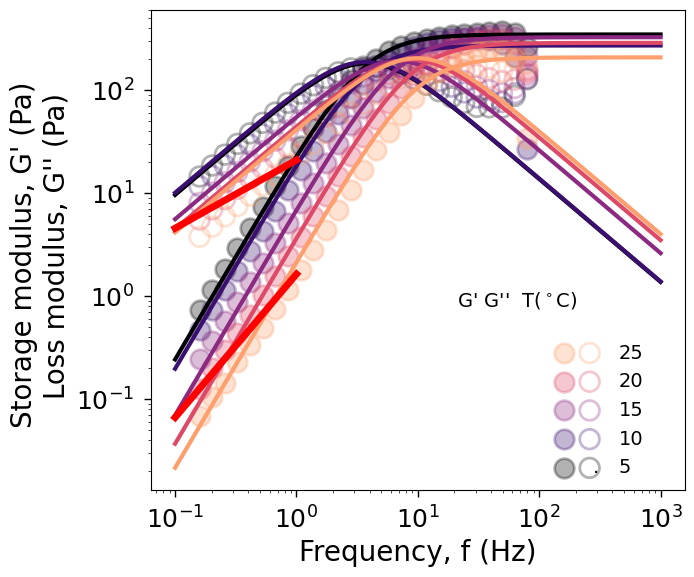

In [133]:
def model1(ω, G0, λ_i):
    return G0 * (ω**2 * λ_i**2) / (1 + ω**2 * λ_i**2)

def model2(ω, G0, λ_i):
    return G0 * (ω * λ_i) / (1 + ω**2 * λ_i**2)

fitting_results_CNFWLM = []

cmap = plt.get_cmap('magma')

fig, ax = plt.subplots(figsize=(6, 6))

for idx, (x, y1, y2, label1, label2) in enumerate(zip(cnf0WLM_ETQ072NaSal015_f_fre, cnf0WLM_ETQ072NaSal015_f_g1, cnf0WLM_ETQ072NaSal015_f_g2, WLM_f_T_label_g1, WLM_f_T_label_g2)):
    if idx < 5:
        c = cmap(float(idx) / len(cnf0WLM_ETQ072NaSal015_f_fre))
        scatter1 = plt.scatter(x, y1, c=np.atleast_2d(c), s=200, alpha=0.3,
                               marker='o', facecolors=c, edgecolors=c, linewidths=2, label=label1)
        scatter2 = plt.scatter(x, y2, c=np.atleast_2d(c), s=200, alpha=0.3,
                               marker='o', edgecolors=c, linewidths=2, label=label2)
        scatter2.set_facecolor('none')

        x_flat_CNFWLM = np.ravel(x)
        y1_flat_CNFWLM = np.ravel(y1)
        y2_flat_CNFWLM = np.ravel(y2)

        G0_guess_1 = np.max(y1_flat_CNFWLM)
        G0_guess_2 = np.max(y2_flat_CNFWLM)
        lambda_guess = 0.01  # Initial guess for lambda (common to both G' and G'' models)

        # Perform curve fitting using the same lambda value for both models
        popt1_CNFWLM, _ = curve_fit(model1, x_flat_CNFWLM, y1_flat_CNFWLM, p0=[G0_guess_1, lambda_guess])
        popt2_CNFWLM, _ = curve_fit(model2, x_flat_CNFWLM, y2_flat_CNFWLM, p0=[G0_guess_2, lambda_guess])

        G0_1_CNFWLM, lambda_CNFWLM = popt1_CNFWLM[0], popt1_CNFWLM[1]
        G0_2_CNFWLM = popt2_CNFWLM[0]

        # Extend the range of x values for plotting the fitted curves
        extended_x_range = np.logspace(-1, 3, 1000)
        extended_y1 = model1(extended_x_range, G0_1_CNFWLM, lambda_CNFWLM)
        extended_y2 = model2(extended_x_range, G0_2_CNFWLM, lambda_CNFWLM)

        plt.plot(extended_x_range, extended_y1, '-', c=c, linewidth=3)#, label=f'{label1} (Fitted)')
        plt.plot(extended_x_range, extended_y2, '-', c=c, linewidth=3)#, label=f'{label2} (Fitted)')

        fitting_results_CNFWLM.append({
            'Data Set': idx + 1,
            'CNF': label2,
            "G'": f"{G0_1_CNFWLM:.2f}",
            "λ": f"{lambda_CNFWLM:.4f}",  # Use a common lambda value for both G' and G''
            "G''": f"{G0_2_CNFWLM:.2f}",
        })

# Perform linear regression within the selected G' and G'' range
selected_x_range = np.linspace(0.1, 1, 100)  # Updated selected range for linear fit
selected_y1 = np.log10(2) * np.ones(100)  # G' scaling to 2
selected_y2 = np.log10(1) * np.ones(100)  # G'' scaling to 1

# Perform linear regression
regressor1 = LinearRegression()
regressor1.fit(np.log10(x_flat_CNFWLM.reshape(-1, 1)), np.log10(y1_flat_CNFWLM))
selected_y1_fit = 10 ** regressor1.predict(np.log10(selected_x_range.reshape(-1, 1)))

regressor2 = LinearRegression()
regressor2.fit(np.log10(x_flat_CNFWLM.reshape(-1, 1)), np.log10(y2_flat_CNFWLM))
selected_y2_fit = 10 ** regressor2.predict(np.log10(selected_x_range.reshape(-1, 1)))

# Plot the linear fit line within the selected range
plt.plot(selected_x_range, selected_y1_fit, '-', c='r', linewidth=5)#, label='Linear Fit (G\' scaling to 2)')
plt.plot(selected_x_range, selected_y2_fit, '-', c='r', linewidth=5)#, label='Linear Fit (G\'\' scaling to 1)')

fitting_df_CNFWLM = pd.DataFrame(fitting_results_CNFWLM)
print(fitting_df_CNFWLM)


plt.style.use('seaborn-notebook')
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Frequency, f (Hz)', fontsize=20)
plt.ylabel("Storage modulus, G' (Pa) \n Loss modulus, G'' (Pa)", fontsize=20)

legend_handles = [(scatter1, scatter2) for scatter1, scatter2 in zip(scatter1.get_paths(), scatter2.get_paths())]
legend_labels = WLM_r2_label_g2

handler_map = {}
for handle, label in zip(legend_handles, legend_labels):
    handler_map[handle] = HandlerTuple(ndivide=None, pad=0.3)

handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[1::2] + handles[::2]  # Combine G1 and G2 handles
labels = labels[1::2] + labels[::2]   # Combine G1 and G2 labels

label_colors = ['white' if i < 4 else 'black' for i in range(len(labels))]
legend = plt.legend(handles[::-1], labels[::-1], frameon=False, fontsize=14,
                    handler_map=handler_map, labelcolor=label_colors, ncol=2,
                    handlelength=-5, handletextpad=4, loc=(0.85, 0.01))

plt.subplots_adjust(left=0.01, right=0.9, top=0.9, bottom=0.1)

plt.text(21, 0.8, "G' G''  T($^\circ$C)", fontsize=14, color='black')

plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Uncomment the following lines if you want to set specific limits for the plot
# plt.xlim(minimum_x_value, maximum_x_value)
# plt.ylim(minimum_y_value, maximum_y_value)

#plt.savefig("Frequency Sweep WLM(0.72ETQ0.15NaSal) 5C to 25C fitted.png", dpi=1500, bbox_inches='tight')
plt.show()

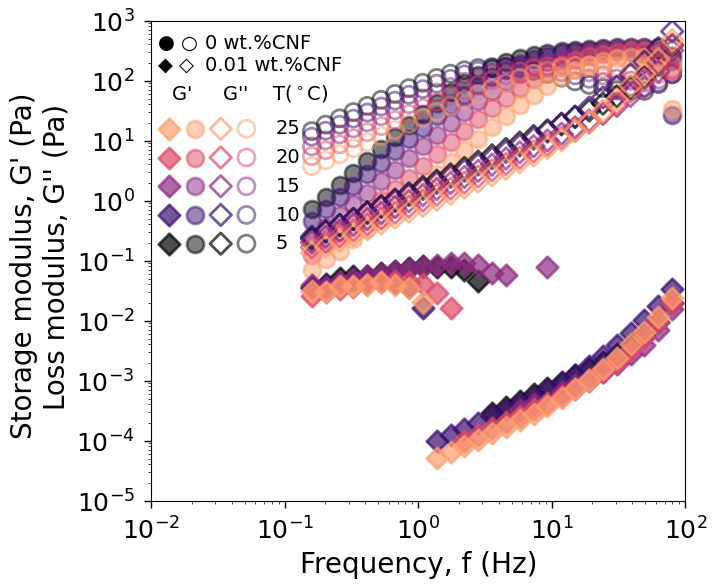

In [422]:
cmap = plt.get_cmap('magma')

# Plot the data
fig, ax = plt.subplots(figsize=(6, 6))

for idx, (x, y1, y2, label1, label2) in enumerate(zip(cnf0WLM_ETQ072NaSal015_f_fre, cnf0WLM_ETQ072NaSal015_f_g1, cnf0WLM_ETQ072NaSal015_f_g2, WLM_f_T_label_g1, WLM_f_T_label_g2)):
    c = cmap(float(idx) / len(cnf0WLM_ETQ072NaSal015_f_fre))
    scatter1 = plt.scatter(x, y1, c=np.atleast_2d(c), s = 150, alpha = 0.5,
                marker='o', facecolors=c, edgecolors=c, linewidths=2, label=label1)
    scatter2 = plt.scatter(x, y2, c=np.atleast_2d(c), s = 150, alpha = 0.5,
                marker='o', edgecolors=c, linewidths=2, label=label2)
    scatter2.set_facecolor('none') 
    
for idx, (x, y1, y2, label1, label2) in enumerate(zip(cnf001WLM_ETQ036NaSal015_f_fre, cnf001WLM_ETQ036NaSal015_f_g1, cnf001WLM_ETQ036NaSal015_f_g2, WLM_f_T_label_g1, WLM_f_T_label_g2)):
    c = cmap(float(idx) / len(cnf001WLM_ETQ036NaSal015_f_fre))
    scatter3 = plt.scatter(x, y1, c=np.atleast_2d(c), s =120, alpha = 0.7,
                marker='D', facecolors=c, edgecolors=c, linewidths=2, label=label1)
    scatter4 = plt.scatter(x, y2, c=np.atleast_2d(c), s =120, alpha = 0.7,
                marker='D', edgecolors=c, linewidths=2, label=label1)
    scatter4.set_facecolor('none') 
    
plt.style.use('seaborn-notebook')
#plt.rcParams['font.family'] = 'Arial'
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Frequency, f (Hz)', fontsize=20)
#plt.xlabel('Angular frequency, \u03C9 (rad/s)', fontsize=20)
plt.ylabel("Storage modulus, G' (Pa) \n Loss modulus, G'' (Pa)", fontsize=20)

legend_handles = [(scatter1, scatter2) for scatter1, scatter2 in zip(scatter1.get_paths(), scatter2.get_paths())]
legend_handles_2 = [(scatter3, scatter4) for scatter3, scatter4 in zip(scatter3.get_paths(), scatter4.get_paths())]
legend_labels = WLM_f_T_label_g2

handler_map = {}
for handle, handle2, label in zip(legend_handles_2, legend_handles, legend_labels):
    handler_map[handle, handle2] = HandlerTuple(ndivide=None, pad=0.3)

handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[1::2] + handles[::2]  # Combine G1 and G2 handles
labels =  labels[1::2] + labels[::2]   # Combine G1 and G2 labels

label_colors = ['white' if i < 15 else 'black' for i in range(len(labels))]
legend = plt.legend(handles[::-1], labels[::-1], frameon=False, fontsize=14, 
                    handler_map=handler_map, labelcolor=label_colors, ncol =4,
                    handlelength=-5, handletextpad=4, loc = (0.11,0.5))


plt.subplots_adjust(left=0.01, right=0.9, top=0.9, bottom=0.1)  # Adjust the values as needed

plt.text(0.011, 150, "$\u25CF$ $\u25CB$\n$\u25C6$ $\u25C7$", fontsize=14, color='black')
plt.text(0.025, 150, "0 wt.%CNF \n0.01 wt.%CNF", fontsize=14, color='black')
plt.text(0.014, 50, "G'     G''    T($^\circ$C)", fontsize=14, color='black')
#plt.text(0.012, 300, "(0.01wt.%)(0wt.%)(0.01wt.%)(0wt.%)", fontsize=8, color='black')

plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(0.01, 100)
plt.ylim(0.00001, 1000)
#plt.savefig("Frequency Sweep Comparison WLM(0.72ETQ0.15NaSal) at all T.png", dpi=1500, bbox_inches='tight')
plt.show()

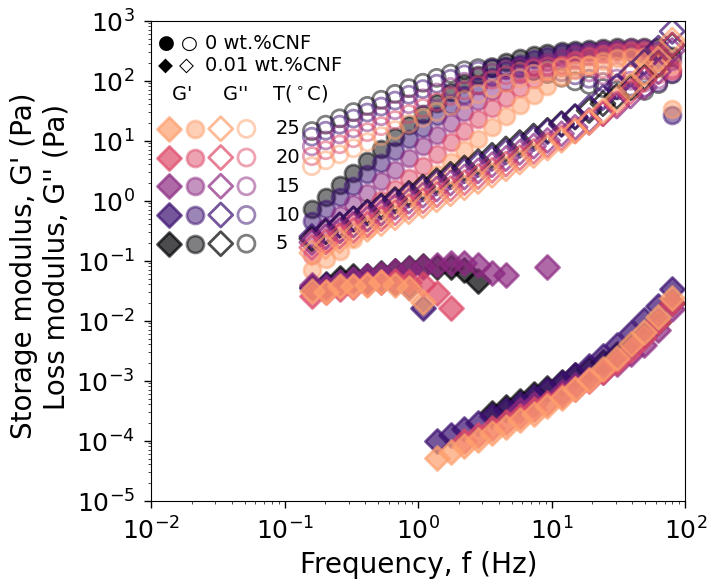

In [110]:
cmap = plt.get_cmap('magma')

# Plot the data
fig, ax = plt.subplots(figsize=(6, 6))

for idx, (x, y1, y2, label1, label2) in enumerate(zip(cnf0WLM_ETQ072NaSal015_f_fre, cnf0WLM_ETQ072NaSal015_f_g1, cnf0WLM_ETQ072NaSal015_f_g2, WLM_f_T_label_g1, WLM_f_T_label_g2)):
    if idx < 5:
        c = cmap(float(idx) / len(cnf0WLM_ETQ072NaSal015_f_fre))
        scatter1 = plt.scatter(x, y1, c=np.atleast_2d(c), s =150, alpha = 0.5,
                    marker='o', facecolors=c, edgecolors=c, linewidths=2, label=label1)
        scatter2 = plt.scatter(x, y2, c=np.atleast_2d(c), s =150, alpha = 0.5,
                    marker='o', edgecolors=c, linewidths=2, label=label2)
        scatter2.set_facecolor('none') 
    
for idx, (x, y1, y2, label1, label2) in enumerate(zip(cnf001WLM_ETQ036NaSal015_f_fre, cnf001WLM_ETQ036NaSal015_f_g1, cnf001WLM_ETQ036NaSal015_f_g2, WLM_f_T_label_g1, WLM_f_T_label_g2)):
    if idx < 5:
        c = cmap(float(idx) / len(cnf001WLM_ETQ036NaSal015_f_fre))
        scatter3 = plt.scatter(x, y1, c=np.atleast_2d(c), s =150, alpha = 0.7,
                    marker='D', facecolors=c, edgecolors=c, linewidths=2, label=label1)
        scatter4 = plt.scatter(x, y2, c=np.atleast_2d(c), s =150, alpha = 0.7,
                    marker='D', edgecolors=c, linewidths=2, label=label1)
        scatter4.set_facecolor('none') 
    
plt.style.use('seaborn-notebook')
#plt.rcParams['font.family'] = 'Arial'
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Frequency, f (Hz)', fontsize=20)
#plt.xlabel('Angular frequency, \u03C9 (rad/s)', fontsize=20)
plt.ylabel("Storage modulus, G' (Pa) \n Loss modulus, G'' (Pa)", fontsize=20)

legend_handles = [(scatter1, scatter2) for scatter1, scatter2 in zip(scatter1.get_paths(), scatter2.get_paths())]
legend_handles_2 = [(scatter3, scatter4) for scatter3, scatter4 in zip(scatter3.get_paths(), scatter4.get_paths())]
legend_labels = WLM_f_T_label_g2

handler_map = {}
for handle, handle2, label in zip(legend_handles_2, legend_handles, legend_labels):
    handler_map[handle, handle2] = HandlerTuple(ndivide=None, pad=0.3)

handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[1::2] + handles[::2]  # Combine G1 and G2 handles
labels =  labels[1::2] + labels[::2]   # Combine G1 and G2 labels

label_colors = ['white' if i < 15 else 'black' for i in range(len(labels))]
legend = plt.legend(handles[::-1], labels[::-1], frameon=False, fontsize=14, 
                    handler_map=handler_map, labelcolor=label_colors, ncol =4,
                    handlelength=-5, handletextpad=4, loc = (0.11,0.5))

plt.subplots_adjust(left=0.01, right=0.9, top=0.9, bottom=0.1)  # Adjust the values as needed

plt.text(0.011, 150, "$\u25CF$ $\u25CB$\n$\u25C6$ $\u25C7$", fontsize=14, color='black')
plt.text(0.025, 150, "0 wt.%CNF \n0.01 wt.%CNF", fontsize=14, color='black')
plt.text(0.014, 50, "G'     G''    T($^\circ$C)", fontsize=14, color='black')
#plt.text(0.012, 300, "(0.01wt.%)(0wt.%)(0.01wt.%)(0wt.%)", fontsize=8, color='black')

plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(0.01, 100)
plt.ylim(0.00001, 1000)
#plt.savefig("Frequency Sweep Comparison WLM(0.72ETQ0.15NaSal) at 5C to 25C.png", dpi=1500, bbox_inches='tight')
plt.show()

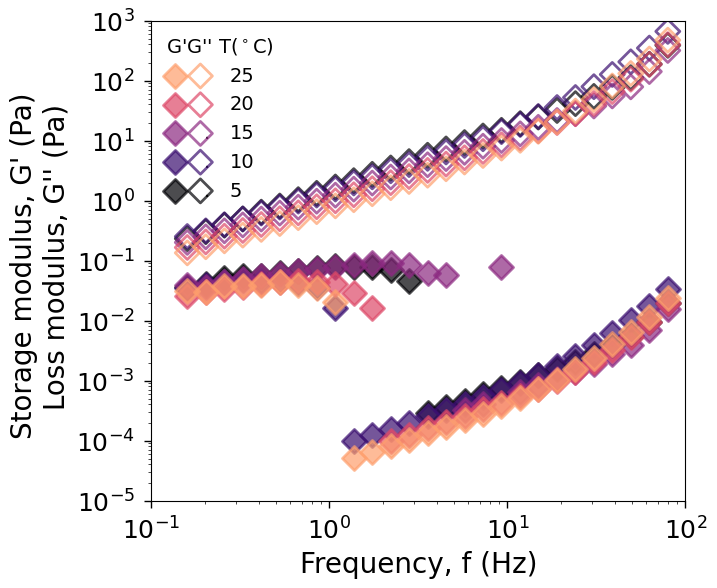

In [82]:
cmap = plt.get_cmap('magma')

# Plot the data
fig, ax = plt.subplots(figsize=(6, 6))
 
for idx, (x, y1, y2, label1, label2) in enumerate(zip(cnf001WLM_ETQ036NaSal015_f_fre, cnf001WLM_ETQ036NaSal015_f_g1, cnf001WLM_ETQ036NaSal015_f_g2, WLM_f_T_label_g1, WLM_f_T_label_g2)):
    if idx < 5:
        c = cmap(float(idx) / len(cnf001WLM_ETQ036NaSal015_f_fre))
        scatter3 = plt.scatter(x, y1, c=np.atleast_2d(c), s =150, alpha = 0.7,
                    marker='D', facecolors=c, edgecolors=c, linewidths=2, label=label1)
        scatter4 = plt.scatter(x, y2, c=np.atleast_2d(c), s =150, alpha = 0.7,
                    marker='D', edgecolors=c, linewidths=2, label=label2)
        scatter4.set_facecolor('none') 
    
plt.style.use('seaborn-notebook')
#plt.rcParams['font.family'] = 'Arial'
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Frequency, f (Hz)', fontsize=20)
#plt.xlabel('Angular frequency, \u03C9 (rad/s)', fontsize=20)
plt.ylabel("Storage modulus, G' (Pa) \n Loss modulus, G'' (Pa)", fontsize=20)

legend_handles = [(scatter3, scatter4) for scatter3, scatter4 in zip(scatter3.get_paths(), scatter4.get_paths())]
legend_labels = WLM_f_T_label_g2

handler_map = {}
for handle, label in zip(legend_handles, legend_labels):
    handler_map[handle] = HandlerTuple(ndivide=None, pad=0.3)

handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[1::2] + handles[::2]  # Combine G1 and G2 handles
labels =  labels[1::2] + labels[::2]   # Combine G1 and G2 labels

label_colors = ['white' if i < 2 else 'black' for i in range(len(labels))]
legend = plt.legend(handles[::-1], labels[::-1], frameon=False, fontsize=14, 
                    handler_map=handler_map, labelcolor=label_colors, ncol =2,
                    handlelength=-5, handletextpad=4, loc = (0.12,0.61))


plt.subplots_adjust(left=0.01, right=0.9, top=0.9, bottom=0.1)  # Adjust the values as needed

plt.text(0.12, 300, "G'G'' T($^\circ$C)", fontsize=14, color='black')
#plt.text(0.012, 300, "(0.01wt.%)(0wt.%)(0.01wt.%)(0wt.%)", fontsize=8, color='black')

plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(0.1, 100)
plt.ylim(0.00001, 1000)
plt.savefig("Frequency Sweep Comparison WLM(0.72ETQ0.15NaSal) with 0.01wt.%CNF at all T.png", dpi=1500, bbox_inches='tight')
plt.show()